<a href="https://colab.research.google.com/github/Suratan63011017/DataStructures-And-Algorithm-Grader/blob/main/Untitled19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib
!pip install tensorflow==2.9
!pip install scikit-learn
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 110.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 102.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 61.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: tensor

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [3]:
import cv2
import numpy as np

# 5.1

In [4]:
image = cv2.imread("Focuss.jpg")
image = cv2.resize(image, (400,600))

In [5]:
reduce_factors = [2, 8, 15]
scale_factors = [1 / factor for factor in reduce_factors]

inter_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]
inter_texts = ["INTER_NEAREST", "INTER_LINEAR", "INTER_CUBIC", "INTER_AREA"]

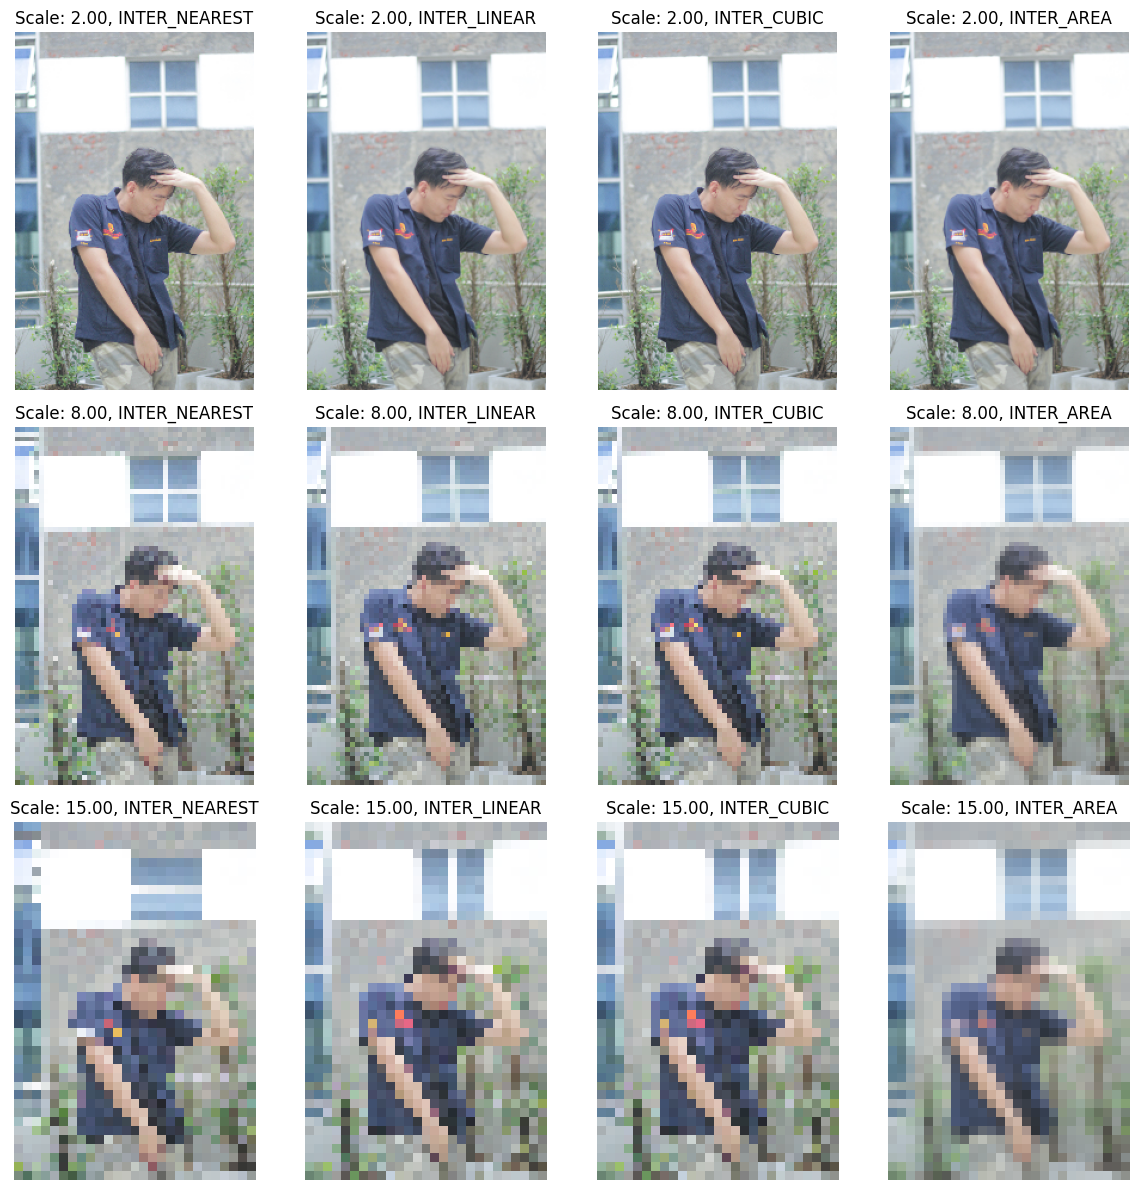

In [6]:
# Create a 4x4 grid to display the resized images
fig, axs = plt.subplots(len(reduce_factors), len(inter_methods), figsize=(12, 12))

# Iterate through each combination of scale factors and interpolation methods
for i, scale_factor in enumerate(scale_factors):
    for j, inter_method in enumerate(inter_methods):
        # Resize the image using the current scale factor and interpolation method
        resized_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=inter_method)

        # Display the resized image using Matplotlib
        axs[i, j].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
        axs[i, j].set_title(f"Scale: {1/scale_factor:.2f}, {inter_texts[j]}")
        axs[i, j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

# 5.2

In [7]:
image = cv2.imread("Focuss.jpg")
image = cv2.resize(image, (400,600))

In [8]:
def add_noise(image):
    noise_mean = 0
    noise_std = 10
    noise_factor = 5
    noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
    # print(noisy_image.shape)
    # print(type(noisy_image))
    return noisy_image

In [9]:
rotation_range = 30  # Degrees
width_shift_range = 0.2  # Fraction of total width
height_shift_range = 0.2  # Fraction of total height
shear_range = 0.2  # Shear angle in radians
zoom_range = 0.2  # Random zoom range
horizontal_flip = True  # Allow horizontal flipping

# Define fill modes
fill_modes = ['constant', 'nearest', 'reflect', 'wrap']
image = img_to_array(image)
# Create a list to store augmented images
augmented_images = []

# Loop through each fill mode
for fill_mode in fill_modes:
    datagen = ImageDataGenerator(
        rotation_range=rotation_range,
        width_shift_range=width_shift_range,
        height_shift_range=height_shift_range,
        shear_range=shear_range,
        zoom_range=zoom_range,
        horizontal_flip=horizontal_flip,
        preprocessing_function=add_noise,
        fill_mode=fill_mode
    )

    # Generate augmented images and add them to the list
    augmented_batch = datagen.flow(np.expand_dims(image, 0), batch_size=1)
    for i in range(1, 6):
        batch = augmented_batch.next()
        im_result = batch[0].astype('uint8') # choose first
        augmented_images.append(im_result)

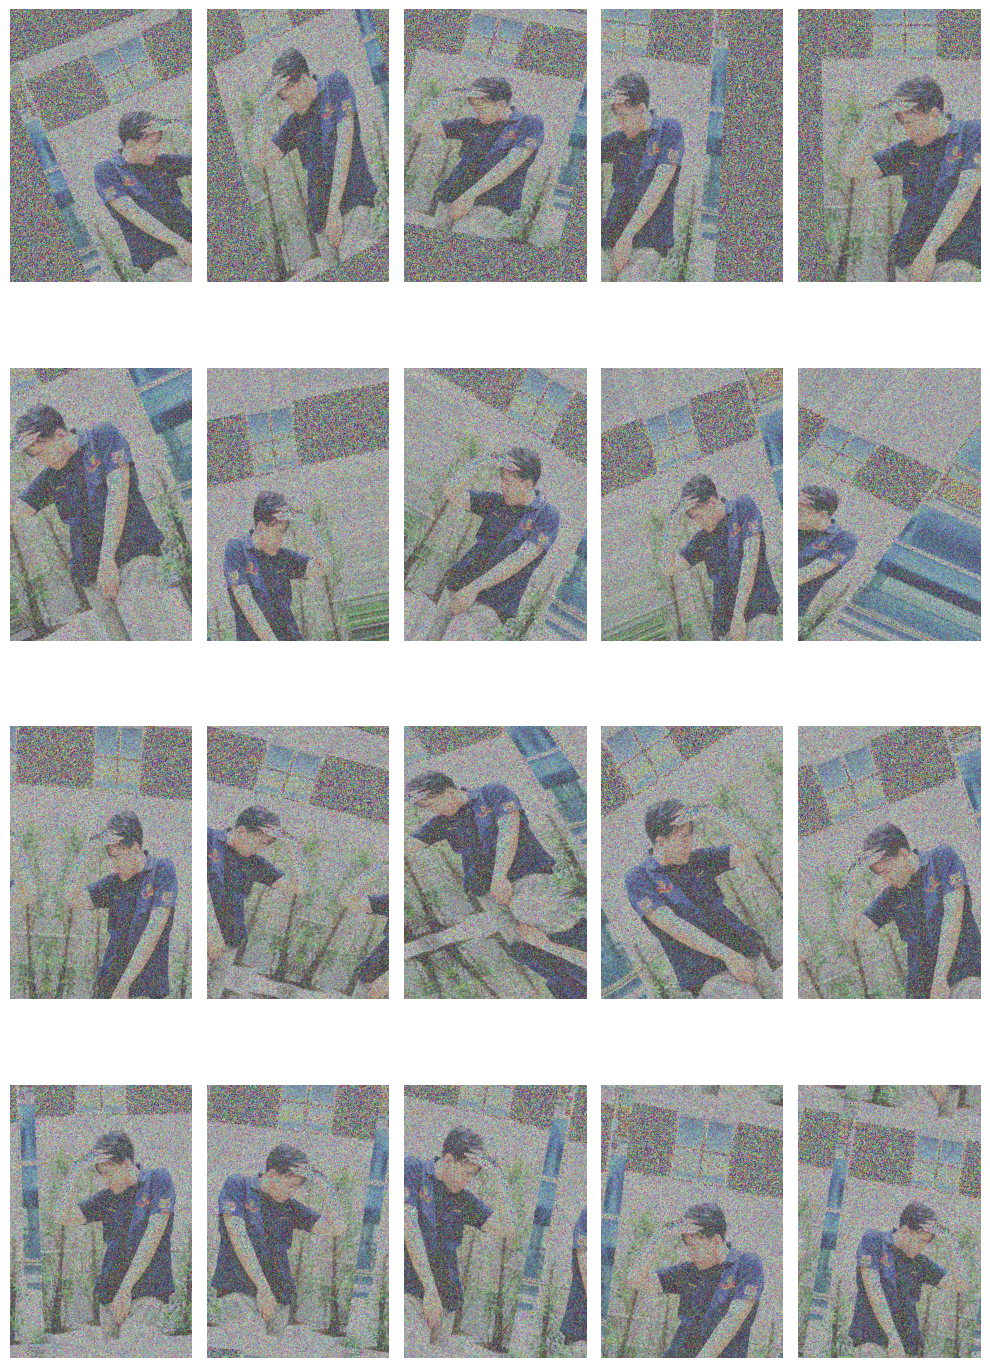

In [10]:
# Define the figure size (adjust as needed)
fig_width = 10
fig_height = 15

# Create a larger figure to display the augmented images
plt.figure(figsize=(fig_width, fig_height))

# Iterate through the augmented images and display them
for i, augmented_image in enumerate(augmented_images):
    plt.subplot(4, len(fill_modes)+1, i + 1)  # Create a subplot for each image
    plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
len(augmented_images)

20

# 5.3

4422102/4422102 [==============================] - 0s 0us/step
50000
10000
10000
50000
10000
10000
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


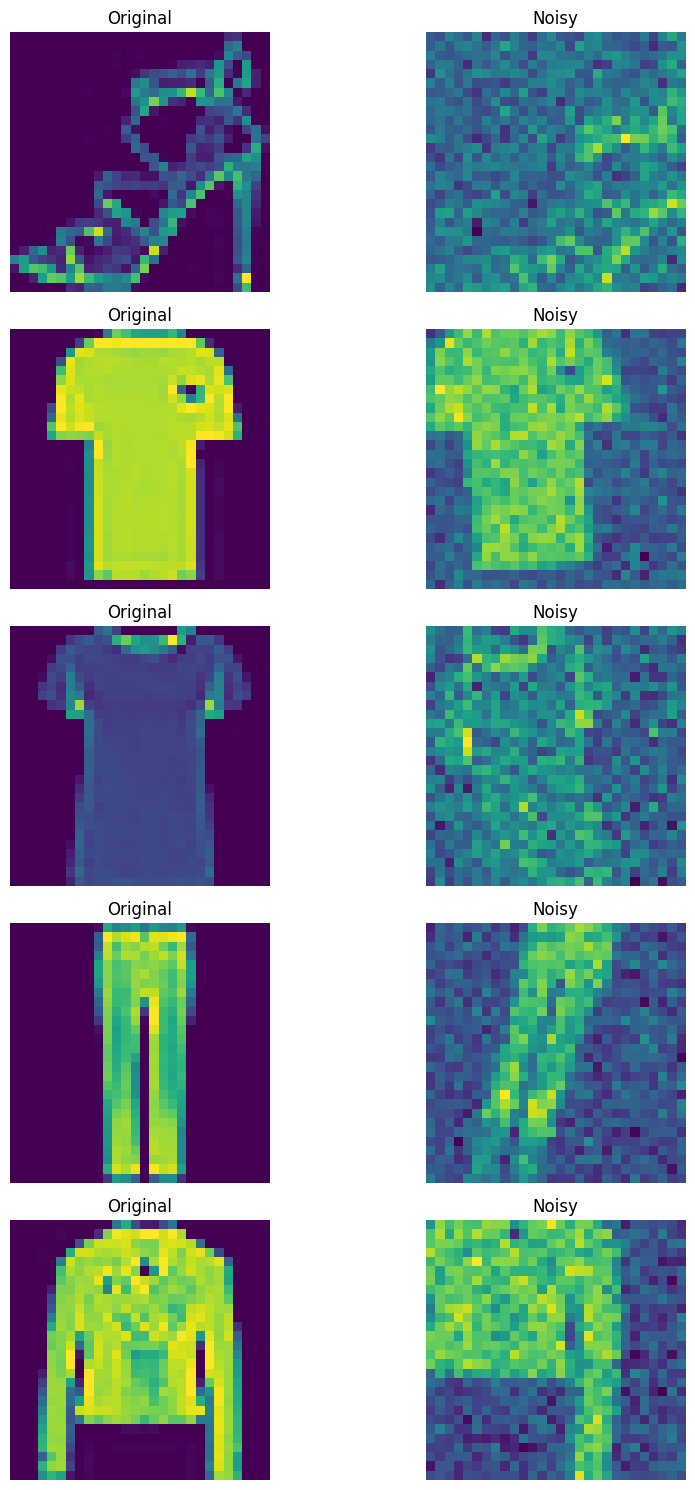

In [12]:
rotation_range = 30  # Degrees
width_shift_range = 0.2  # Fraction of total width
height_shift_range = 0.2  # Fraction of total height
shear_range = 0.2  # Shear angle in radians
zoom_range = 0.2  # Random zoom range
horizontal_flip = True  # Allow horizontal flipping
fill_modes = ['constant', 'nearest', 'reflect', 'wrap']

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Split the training data into train, test, and validation sets
random_state = 42
test_size = 0.2
x_train, x_val = train_test_split(x_train, random_state=random_state, test_size=(1/6))
# x_test, x_val = train_test_split(x_test, random_state=random_state, test_size=0.5)
print(len(x_train))
print(len(x_val))
print(len(x_test))
# Prepare Gaussian Noise Function
def add_noise(image):
    noise_mean = 0
    noise_std = 0.5
    noise_factor = 0.3
    noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
    return noisy_image

noisy_x_train = []
noisy_x_val = []
noisy_x_test = []

# Define noise parameters

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=add_noise
)

# # Example usage of datagen to generate augmented images
# # This is typically used in a loop to generate batches of augmented images during training
# batch_size = 32
# augmented_images = datagen.flow(x_train.reshape(-1, 28, 28, 1), batch_size=batch_size)
# print(len(augmented_images))

# # Display the first 10 augmented images from the first batch
# for i in range(10):
#     augmented_image = augmented_images.next()
#     plt.figure(figsize=(2, 2))
#     plt.imshow(augmented_image[0].reshape(28, 28), cmap='viridis')
#     plt.axis('off')
#     plt.show()
# augmented_images = []

# Generate augmented images for each image in x_train
for image in x_train:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_train.append(augmented_image)
print(len(noisy_x_train))
for image in x_val:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_val.append(augmented_image)
print(len(noisy_x_val))

for image in x_test:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_test.append(augmented_image)
print(len(noisy_x_test))

noisy_x_train = np.array(noisy_x_train)
noisy_x_train = np.squeeze(noisy_x_train)
noisy_x_val = np.array(noisy_x_val)
noisy_x_val = np.squeeze(noisy_x_val)
noisy_x_test = np.array(noisy_x_test)
noisy_x_test = np.squeeze(noisy_x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(noisy_x_train.shape)
print(noisy_x_val.shape)
print(noisy_x_test.shape)

num_rows = 5
num_cols = 2

# Create a figure and axis for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Loop through the pairs of original and noisy images
for i in range(num_rows):
    # Display the original image
    axes[i, 0].imshow(x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    # Display the noisy image
    axes[i, 1].imshow(noisy_x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 1].set_title('Noisy')
    axes[i, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()



In [13]:
# noisy_x_train = np.array(noisy_x_train)
# noisy_x_train = np.squeeze(noisy_x_train)
# noisy_x_val = np.array(noisy_x_val)
# noisy_x_val = np.squeeze(noisy_x_val)
# noisy_x_test = np.array(noisy_x_test)
# noisy_x_test = np.squeeze(noisy_x_test)
# print(noisy_x_train.shape)
# print(noisy_x_val.shape)
# print(noisy_x_test.shape)

In [14]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [15]:
input_img = Input(shape=(28, 28, 1))
# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)

# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)

# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

x6 = UpSampling2D((2, 2))(x5)

x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)


x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)

# Layer 2
x9 = Conv2D(128, (3, 3), activation='relu', padding='same')(x8)
x10 = MaxPool2D((2, 2), strides=(2, 2))(x9)

# Layer 3
x11 = Conv2D(64, (3, 3), activation='relu', padding='same')(x10)

# Layer 4
x12 = Conv2D(64, (3, 3), activation='relu', padding='same')(x11)

x13 = UpSampling2D((2, 2))(x12)

x14 = Conv2D(128, (3, 3), activation='relu', padding='same')(x13)


x15 = Conv2D(256, (3, 3), activation='relu', padding='same')(x14)


x16 = Conv2D(1, (3, 3), activation='relu', padding='same')(x15)
x17 = Dropout(0.1)(x16)

# Create the autoencoder model
autoencoder = Model(input_img, x17)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.0003), loss='mse')

# Display the model summary
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 256)       2560      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                             

In [16]:
callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(
    noisy_x_train,
    x_train,
    epochs=70,
    batch_size=256,
    shuffle=True,
    validation_data=(noisy_x_val, x_val),
    callbacks=[callback],
)

Epoch 1/70
196/196 [==============================] - 27s 82ms/step - loss: 0.0882 - val_loss: 0.0568
Epoch 2/70
196/196 [==============================] - 15s 79ms/step - loss: 0.0666 - val_loss: 0.0472
Epoch 3/70
196/196 [==============================] - 15s 79ms/step - loss: 0.0605 - val_loss: 0.0448
Epoch 4/70
196/196 [==============================] - 15s 79ms/step - loss: 0.0575 - val_loss: 0.0436
Epoch 5/70
196/196 [==============================] - 15s 79ms/step - loss: 0.0556 - val_loss: 0.0419
Epoch 6/70
196/196 [==============================] - 15s 79ms/step - loss: 0.0542 - val_loss: 0.0385
Epoch 7/70
196/196 [==============================] - 15s 79ms/step - loss: 0.0531 - val_loss: 0.0361
Epoch 8/70
196/196 [==============================] - 15s 79ms/step - loss: 0.0521 - val_loss: 0.0358
Epoch 9/70
196/196 [==============================] - 15s 79ms/step - loss: 0.0515 - val_loss: 0.0349
Epoch 10/70
196/196 [==============================] - 15s 79ms/step - loss: 0.051

In [17]:
predictions_test = autoencoder.predict(noisy_x_test)

313/313 [==============================] - 2s 5ms/step


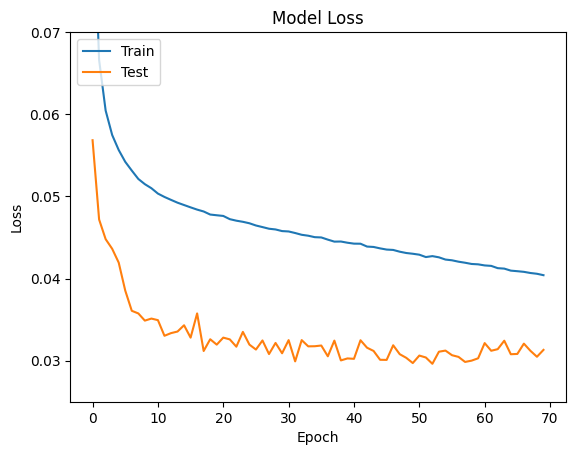

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0.025, 0.07)
plt.show()

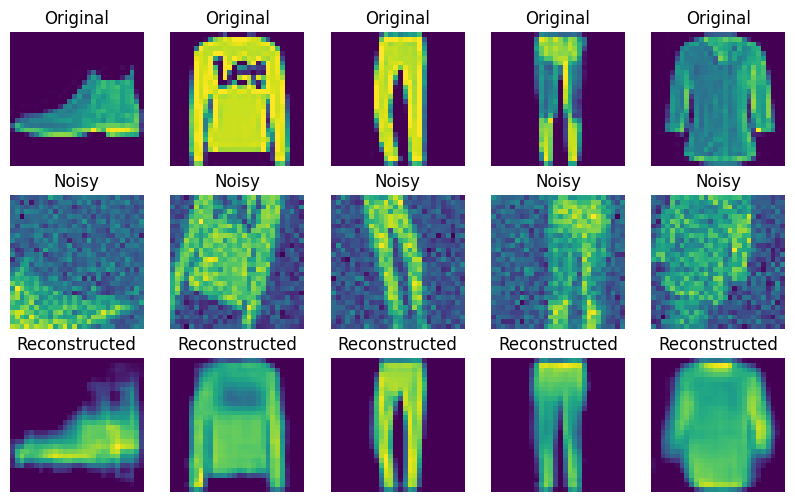

In [19]:

n = 5  # Number of images to display
plt.figure(figsize=(10, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')

    # Noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_x_test[i])
    plt.title('Noisy')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predictions_test[i])
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()

# noise std = 0.5, noise_factor = 0.3

50000
10000
10000
50000
10000
10000
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


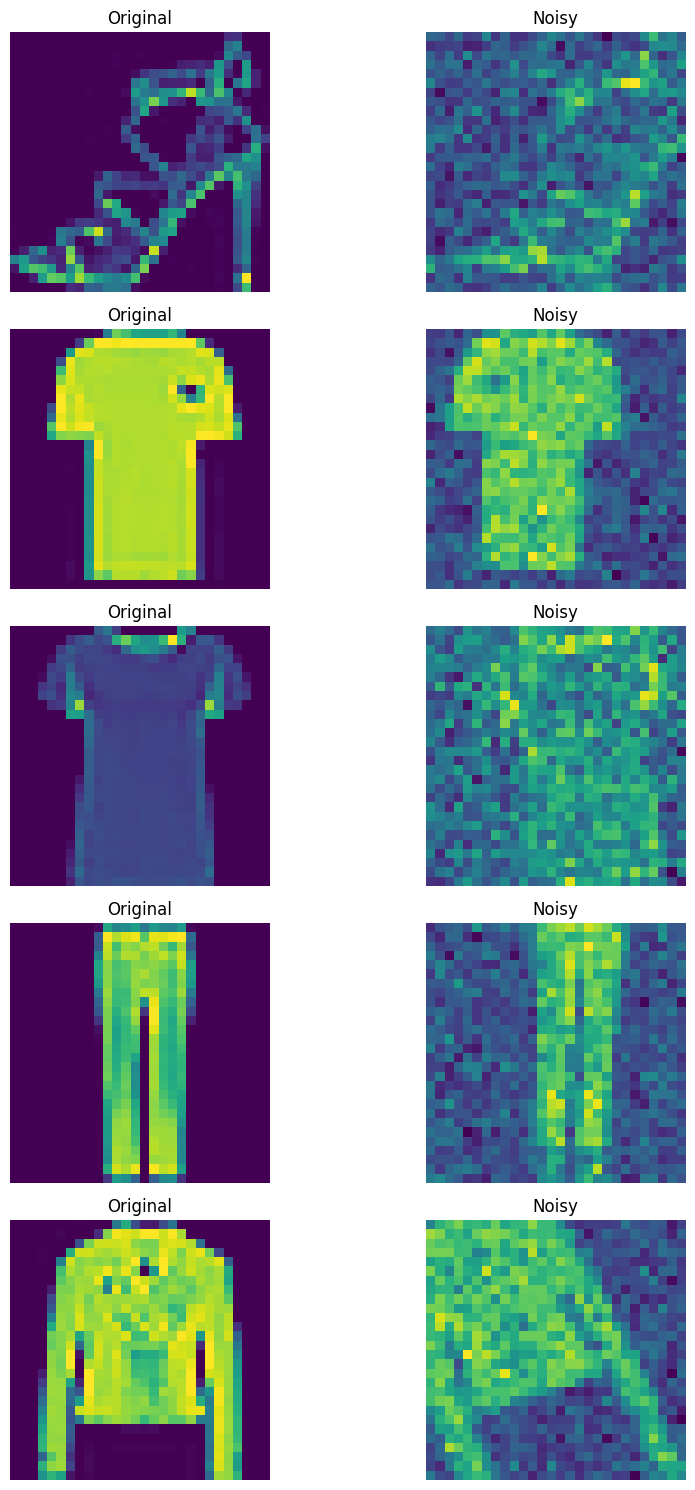

In [20]:
rotation_range = 30  # Degrees
width_shift_range = 0.2  # Fraction of total width
height_shift_range = 0.2  # Fraction of total height
shear_range = 0.2  # Shear angle in radians
zoom_range = 0.2  # Random zoom range
horizontal_flip = True  # Allow horizontal flipping
fill_modes = ['constant', 'nearest', 'reflect', 'wrap']

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Split the training data into train, test, and validation sets
random_state = 42
test_size = 0.2
x_train, x_val = train_test_split(x_train, random_state=random_state, test_size=(1/6))
# x_test, x_val = train_test_split(x_test, random_state=random_state, test_size=0.5)
print(len(x_train))
print(len(x_val))
print(len(x_test))
# Prepare Gaussian Noise Function
def add_noise(image):
    noise_mean = 0
    noise_std = 0.5
    noise_factor = 0.3
    noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
    return noisy_image

noisy_x_train = []
noisy_x_val = []
noisy_x_test = []

# Define noise parameters

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=add_noise
)

# # Example usage of datagen to generate augmented images
# # This is typically used in a loop to generate batches of augmented images during training
# batch_size = 32
# augmented_images = datagen.flow(x_train.reshape(-1, 28, 28, 1), batch_size=batch_size)
# print(len(augmented_images))

# # Display the first 10 augmented images from the first batch
# for i in range(10):
#     augmented_image = augmented_images.next()
#     plt.figure(figsize=(2, 2))
#     plt.imshow(augmented_image[0].reshape(28, 28), cmap='viridis')
#     plt.axis('off')
#     plt.show()
# augmented_images = []

# Generate augmented images for each image in x_train
for image in x_train:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_train.append(augmented_image)
print(len(noisy_x_train))
for image in x_val:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_val.append(augmented_image)
print(len(noisy_x_val))

for image in x_test:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_test.append(augmented_image)
print(len(noisy_x_test))

noisy_x_train = np.array(noisy_x_train)
noisy_x_train = np.squeeze(noisy_x_train)
noisy_x_val = np.array(noisy_x_val)
noisy_x_val = np.squeeze(noisy_x_val)
noisy_x_test = np.array(noisy_x_test)
noisy_x_test = np.squeeze(noisy_x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(noisy_x_train.shape)
print(noisy_x_val.shape)
print(noisy_x_test.shape)

num_rows = 5
num_cols = 2

# Create a figure and axis for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Loop through the pairs of original and noisy images
for i in range(num_rows):
    # Display the original image
    axes[i, 0].imshow(x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    # Display the noisy image
    axes[i, 1].imshow(noisy_x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 1].set_title('Noisy')
    axes[i, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()



In [21]:
# noisy_x_train = np.array(noisy_x_train)
# noisy_x_train = np.squeeze(noisy_x_train)
# noisy_x_val = np.array(noisy_x_val)
# noisy_x_val = np.squeeze(noisy_x_val)
# noisy_x_test = np.array(noisy_x_test)
# noisy_x_test = np.squeeze(noisy_x_test)
# print(noisy_x_train.shape)
# print(noisy_x_val.shape)
# print(noisy_x_test.shape)

In [22]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [23]:
input_img = Input(shape=(28, 28, 1))
# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)

# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)

# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

x6 = UpSampling2D((2, 2))(x5)

x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)


x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)

# Layer 2
x9 = Conv2D(1, (3, 3), activation='relu', padding='same')(x8)

# Create the autoencoder model
autoencoder = Model(input_img, x9)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.0003), loss='mse')

# Display the model summary
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 256)       2560      
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        36928     
                                                           

In [24]:
callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(
    noisy_x_train,
    x_train,
    epochs=70,
    batch_size=256,
    shuffle=True,
    validation_data=(noisy_x_val, x_val),
    callbacks=[callback],
)

Epoch 1/70
196/196 [==============================] - 9s 45ms/step - loss: 0.0716 - val_loss: 0.0630
Epoch 2/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0589 - val_loss: 0.0565
Epoch 3/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0551 - val_loss: 0.0542
Epoch 4/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0525 - val_loss: 0.0517
Epoch 5/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0509 - val_loss: 0.0505
Epoch 6/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0498 - val_loss: 0.0500
Epoch 7/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0490 - val_loss: 0.0491
Epoch 8/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0484 - val_loss: 0.0484
Epoch 9/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0477 - val_loss: 0.0488
Epoch 10/70
196/196 [==============================] - 9s 43ms/step - loss: 0.0474 - val_lo

In [25]:
predictions_test = autoencoder.predict(noisy_x_test)

313/313 [==============================] - 1s 3ms/step


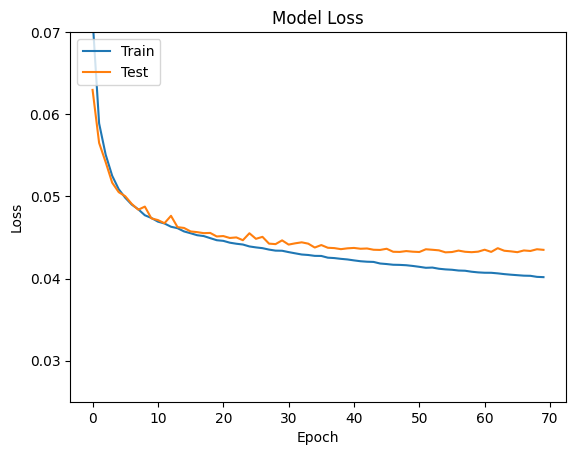

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0.025, 0.07)
plt.show()

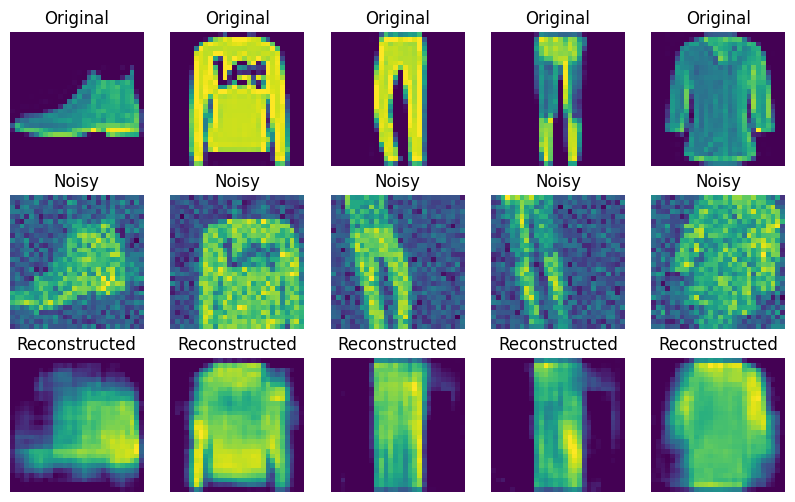

In [27]:

n = 5  # Number of images to display
plt.figure(figsize=(10, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')

    # Noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_x_test[i])
    plt.title('Noisy')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predictions_test[i])
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()

# noise std = 0.1, noise_factor = 0.2

50000
10000
10000
50000
10000
10000
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


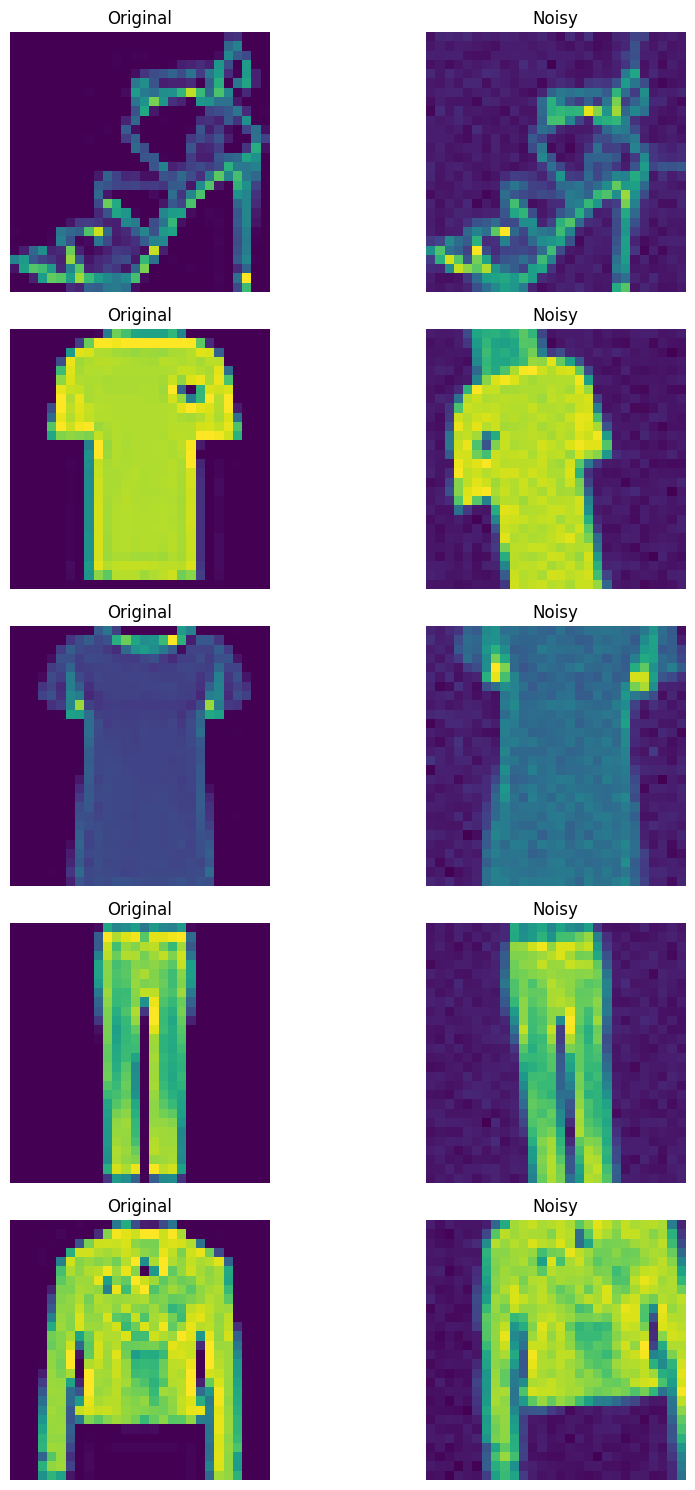

In [28]:
rotation_range = 30  # Degrees
width_shift_range = 0.2  # Fraction of total width
height_shift_range = 0.2  # Fraction of total height
shear_range = 0.2  # Shear angle in radians
zoom_range = 0.2  # Random zoom range
horizontal_flip = True  # Allow horizontal flipping
fill_modes = ['constant', 'nearest', 'reflect', 'wrap']

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Split the training data into train, test, and validation sets
random_state = 42
test_size = 0.2
x_train, x_val = train_test_split(x_train, random_state=random_state, test_size=(1/6))
# x_test, x_val = train_test_split(x_test, random_state=random_state, test_size=0.5)
print(len(x_train))
print(len(x_val))
print(len(x_test))
# Prepare Gaussian Noise Function
def add_noise(image):
    noise_mean = 0
    noise_std = 0.1
    noise_factor = 0.2
    noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
    return noisy_image

noisy_x_train = []
noisy_x_val = []
noisy_x_test = []

# Define noise parameters

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=add_noise
)

# # Example usage of datagen to generate augmented images
# # This is typically used in a loop to generate batches of augmented images during training
# batch_size = 32
# augmented_images = datagen.flow(x_train.reshape(-1, 28, 28, 1), batch_size=batch_size)
# print(len(augmented_images))

# # Display the first 10 augmented images from the first batch
# for i in range(10):
#     augmented_image = augmented_images.next()
#     plt.figure(figsize=(2, 2))
#     plt.imshow(augmented_image[0].reshape(28, 28), cmap='viridis')
#     plt.axis('off')
#     plt.show()
# augmented_images = []

# Generate augmented images for each image in x_train
for image in x_train:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_train.append(augmented_image)
print(len(noisy_x_train))
for image in x_val:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_val.append(augmented_image)
print(len(noisy_x_val))

for image in x_test:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_test.append(augmented_image)
print(len(noisy_x_test))

noisy_x_train = np.array(noisy_x_train)
noisy_x_train = np.squeeze(noisy_x_train)
noisy_x_val = np.array(noisy_x_val)
noisy_x_val = np.squeeze(noisy_x_val)
noisy_x_test = np.array(noisy_x_test)
noisy_x_test = np.squeeze(noisy_x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(noisy_x_train.shape)
print(noisy_x_val.shape)
print(noisy_x_test.shape)

num_rows = 5
num_cols = 2

# Create a figure and axis for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Loop through the pairs of original and noisy images
for i in range(num_rows):
    # Display the original image
    axes[i, 0].imshow(x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    # Display the noisy image
    axes[i, 1].imshow(noisy_x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 1].set_title('Noisy')
    axes[i, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()



In [29]:
# noisy_x_train = np.array(noisy_x_train)
# noisy_x_train = np.squeeze(noisy_x_train)
# noisy_x_val = np.array(noisy_x_val)
# noisy_x_val = np.squeeze(noisy_x_val)
# noisy_x_test = np.array(noisy_x_test)
# noisy_x_test = np.squeeze(noisy_x_test)
# print(noisy_x_train.shape)
# print(noisy_x_val.shape)
# print(noisy_x_test.shape)

In [30]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [31]:
input_img = Input(shape=(28, 28, 1))
# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)

# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)

# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

x6 = UpSampling2D((2, 2))(x5)

x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)


x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)

# Layer 2
x9 = Conv2D(1, (3, 3), activation='relu', padding='same')(x8)

# Create the autoencoder model
autoencoder = Model(input_img, x9)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.0003), loss='mse')

# Display the model summary
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 256)       2560      
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 64)        36928     
                                                           

In [32]:
callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(
    noisy_x_train,
    x_train,
    epochs=70,
    batch_size=256,
    shuffle=True,
    validation_data=(noisy_x_val, x_val),
    callbacks=[callback],
)

Epoch 1/70
196/196 [==============================] - 9s 45ms/step - loss: 0.0707 - val_loss: 0.0616
Epoch 2/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0574 - val_loss: 0.0546
Epoch 3/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0533 - val_loss: 0.0515
Epoch 4/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0506 - val_loss: 0.0496
Epoch 5/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0490 - val_loss: 0.0485
Epoch 6/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0480 - val_loss: 0.0476
Epoch 7/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0470 - val_loss: 0.0468
Epoch 8/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0464 - val_loss: 0.0468
Epoch 9/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0458 - val_loss: 0.0454
Epoch 10/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0453 - val_lo

In [33]:
predictions_test = autoencoder.predict(noisy_x_test)

313/313 [==============================] - 1s 3ms/step


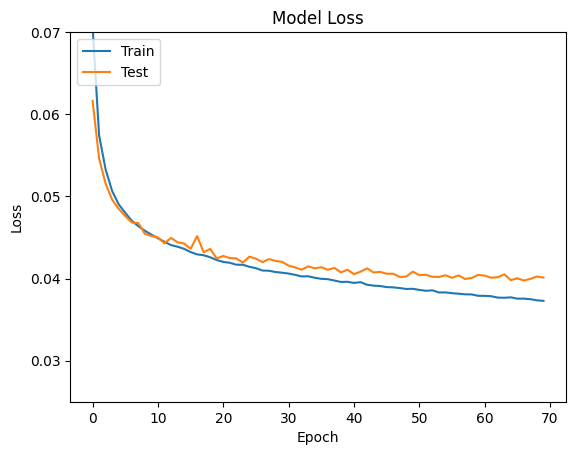

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0.025, 0.07)
plt.show()

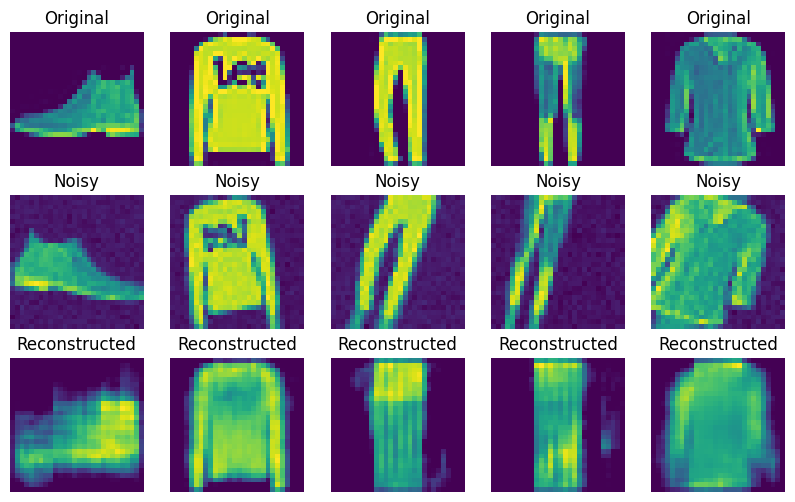

In [35]:

n = 5  # Number of images to display
plt.figure(figsize=(10, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')

    # Noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_x_test[i])
    plt.title('Noisy')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predictions_test[i])
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()

# epoch = 35

50000
10000
10000
50000
10000
10000
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


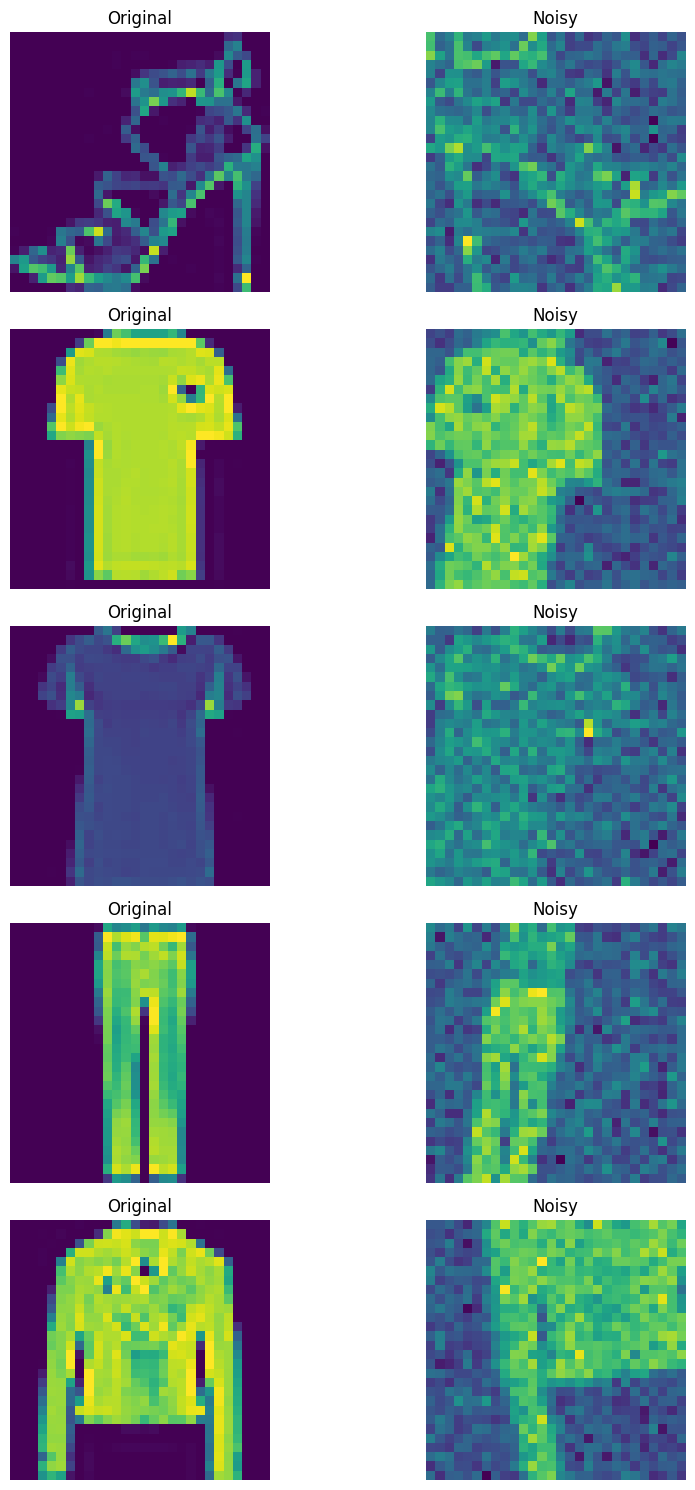

In [36]:
rotation_range = 30  # Degrees
width_shift_range = 0.2  # Fraction of total width
height_shift_range = 0.2  # Fraction of total height
shear_range = 0.2  # Shear angle in radians
zoom_range = 0.2  # Random zoom range
horizontal_flip = True  # Allow horizontal flipping
fill_modes = ['constant', 'nearest', 'reflect', 'wrap']

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Split the training data into train, test, and validation sets
random_state = 42
test_size = 0.2
x_train, x_val = train_test_split(x_train, random_state=random_state, test_size=(1/6))
# x_test, x_val = train_test_split(x_test, random_state=random_state, test_size=0.5)
print(len(x_train))
print(len(x_val))
print(len(x_test))
# Prepare Gaussian Noise Function
def add_noise(image):
    noise_mean = 0
    noise_std = 0.5
    noise_factor = 0.3
    noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
    return noisy_image

noisy_x_train = []
noisy_x_val = []
noisy_x_test = []

# Define noise parameters

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=add_noise
)

# # Example usage of datagen to generate augmented images
# # This is typically used in a loop to generate batches of augmented images during training
# batch_size = 32
# augmented_images = datagen.flow(x_train.reshape(-1, 28, 28, 1), batch_size=batch_size)
# print(len(augmented_images))

# # Display the first 10 augmented images from the first batch
# for i in range(10):
#     augmented_image = augmented_images.next()
#     plt.figure(figsize=(2, 2))
#     plt.imshow(augmented_image[0].reshape(28, 28), cmap='viridis')
#     plt.axis('off')
#     plt.show()
# augmented_images = []

# Generate augmented images for each image in x_train
for image in x_train:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_train.append(augmented_image)
print(len(noisy_x_train))
for image in x_val:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_val.append(augmented_image)
print(len(noisy_x_val))

for image in x_test:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_test.append(augmented_image)
print(len(noisy_x_test))

noisy_x_train = np.array(noisy_x_train)
noisy_x_train = np.squeeze(noisy_x_train)
noisy_x_val = np.array(noisy_x_val)
noisy_x_val = np.squeeze(noisy_x_val)
noisy_x_test = np.array(noisy_x_test)
noisy_x_test = np.squeeze(noisy_x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(noisy_x_train.shape)
print(noisy_x_val.shape)
print(noisy_x_test.shape)

num_rows = 5
num_cols = 2

# Create a figure and axis for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Loop through the pairs of original and noisy images
for i in range(num_rows):
    # Display the original image
    axes[i, 0].imshow(x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    # Display the noisy image
    axes[i, 1].imshow(noisy_x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 1].set_title('Noisy')
    axes[i, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()



In [37]:
# noisy_x_train = np.array(noisy_x_train)
# noisy_x_train = np.squeeze(noisy_x_train)
# noisy_x_val = np.array(noisy_x_val)
# noisy_x_val = np.squeeze(noisy_x_val)
# noisy_x_test = np.array(noisy_x_test)
# noisy_x_test = np.squeeze(noisy_x_test)
# print(noisy_x_train.shape)
# print(noisy_x_val.shape)
# print(noisy_x_test.shape)

In [38]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [39]:
input_img = Input(shape=(28, 28, 1))
# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)

# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)

# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

x6 = UpSampling2D((2, 2))(x5)

x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)


x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)

# Layer 2
x9 = Conv2D(1, (3, 3), activation='relu', padding='same')(x8)

# Create the autoencoder model
autoencoder = Model(input_img, x9)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.0003), loss='mse')

# Display the model summary
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 256)       2560      
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 64)        36928     
                                                           

In [40]:
callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(
    noisy_x_train,
    x_train,
    epochs=35,
    batch_size=256,
    shuffle=True,
    validation_data=(noisy_x_val, x_val),
    callbacks=[callback],
)

Epoch 1/35
196/196 [==============================] - 9s 45ms/step - loss: 0.0704 - val_loss: 0.0610
Epoch 2/35
196/196 [==============================] - 9s 44ms/step - loss: 0.0589 - val_loss: 0.0573
Epoch 3/35
196/196 [==============================] - 9s 44ms/step - loss: 0.0552 - val_loss: 0.0545
Epoch 4/35
196/196 [==============================] - 9s 44ms/step - loss: 0.0526 - val_loss: 0.0543
Epoch 5/35
196/196 [==============================] - 9s 44ms/step - loss: 0.0511 - val_loss: 0.0504
Epoch 6/35
196/196 [==============================] - 9s 44ms/step - loss: 0.0501 - val_loss: 0.0501
Epoch 7/35
196/196 [==============================] - 9s 44ms/step - loss: 0.0490 - val_loss: 0.0492
Epoch 8/35
196/196 [==============================] - 9s 44ms/step - loss: 0.0486 - val_loss: 0.0483
Epoch 9/35
196/196 [==============================] - 9s 44ms/step - loss: 0.0479 - val_loss: 0.0482
Epoch 10/35
196/196 [==============================] - 9s 44ms/step - loss: 0.0476 - val_lo

In [41]:
predictions_test = autoencoder.predict(noisy_x_test)

313/313 [==============================] - 1s 3ms/step


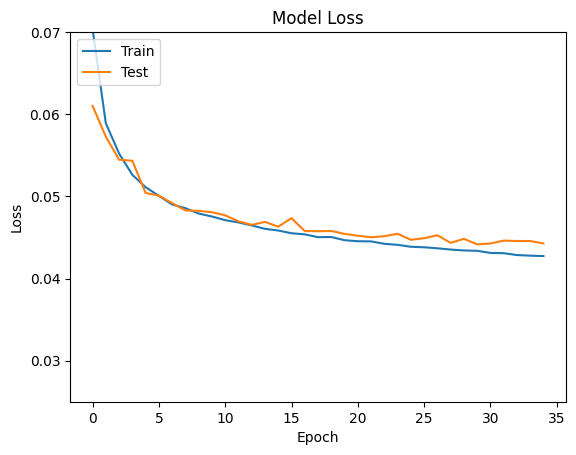

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0.025, 0.07)
plt.show()

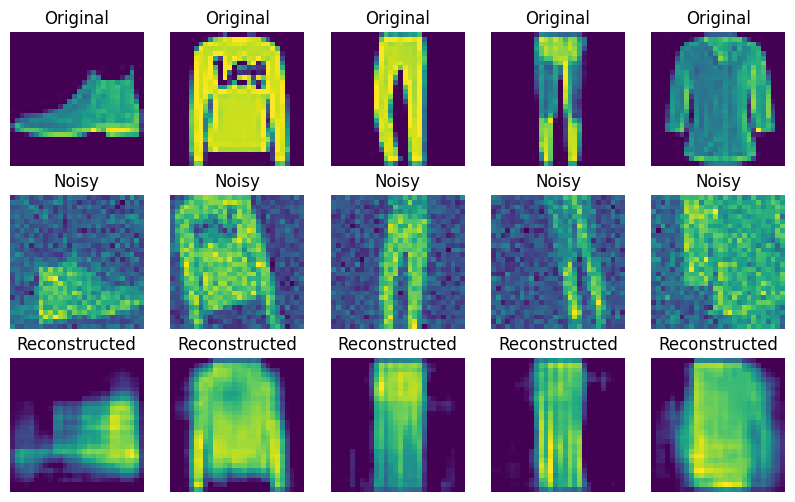

In [43]:

n = 5  # Number of images to display
plt.figure(figsize=(10, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')

    # Noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_x_test[i])
    plt.title('Noisy')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predictions_test[i])
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()

# epoch = 70

50000
10000
10000
50000
10000
10000
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


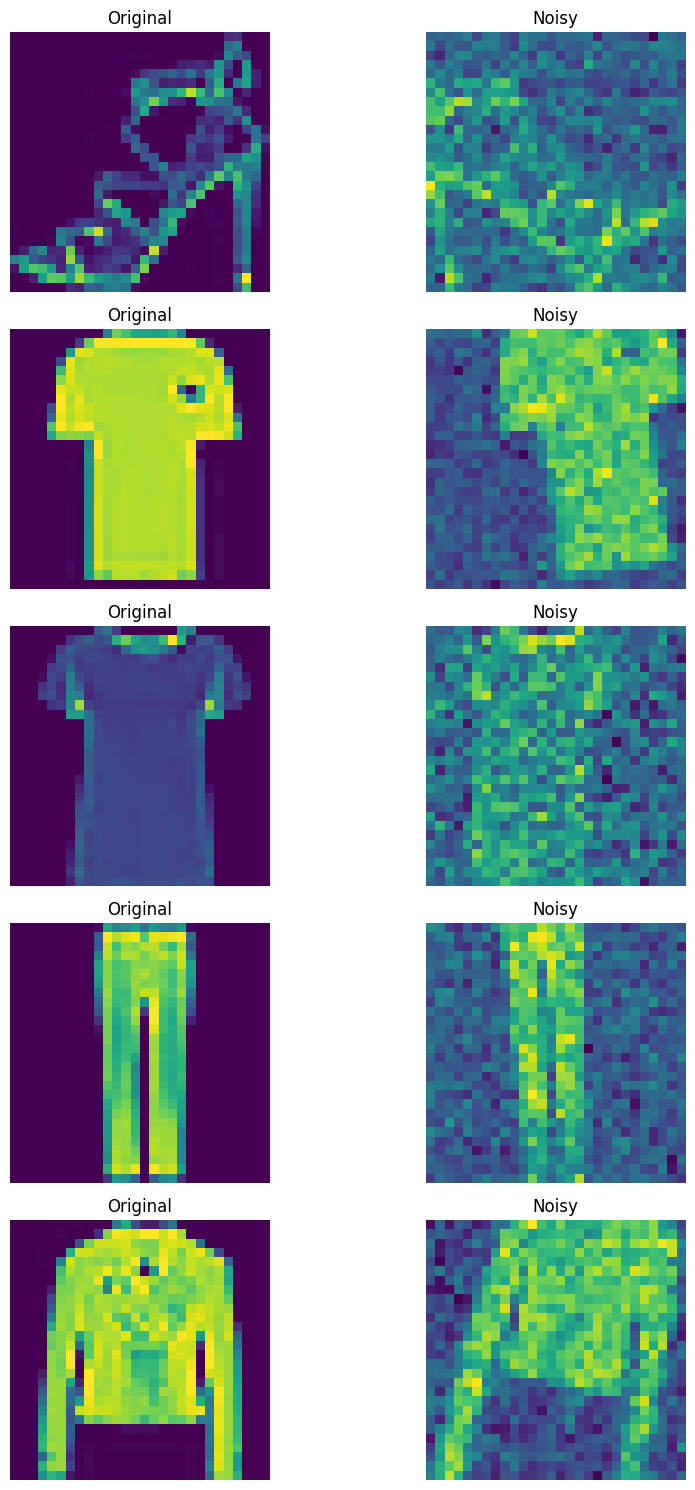

In [44]:
rotation_range = 30  # Degrees
width_shift_range = 0.2  # Fraction of total width
height_shift_range = 0.2  # Fraction of total height
shear_range = 0.2  # Shear angle in radians
zoom_range = 0.2  # Random zoom range
horizontal_flip = True  # Allow horizontal flipping
fill_modes = ['constant', 'nearest', 'reflect', 'wrap']

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Split the training data into train, test, and validation sets
random_state = 42
test_size = 0.2
x_train, x_val = train_test_split(x_train, random_state=random_state, test_size=(1/6))
# x_test, x_val = train_test_split(x_test, random_state=random_state, test_size=0.5)
print(len(x_train))
print(len(x_val))
print(len(x_test))
# Prepare Gaussian Noise Function
def add_noise(image):
    noise_mean = 0
    noise_std = 0.5
    noise_factor = 0.3
    noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
    return noisy_image

noisy_x_train = []
noisy_x_val = []
noisy_x_test = []

# Define noise parameters

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=add_noise
)

# # Example usage of datagen to generate augmented images
# # This is typically used in a loop to generate batches of augmented images during training
# batch_size = 32
# augmented_images = datagen.flow(x_train.reshape(-1, 28, 28, 1), batch_size=batch_size)
# print(len(augmented_images))

# # Display the first 10 augmented images from the first batch
# for i in range(10):
#     augmented_image = augmented_images.next()
#     plt.figure(figsize=(2, 2))
#     plt.imshow(augmented_image[0].reshape(28, 28), cmap='viridis')
#     plt.axis('off')
#     plt.show()
# augmented_images = []

# Generate augmented images for each image in x_train
for image in x_train:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_train.append(augmented_image)
print(len(noisy_x_train))
for image in x_val:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_val.append(augmented_image)
print(len(noisy_x_val))

for image in x_test:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_test.append(augmented_image)
print(len(noisy_x_test))

noisy_x_train = np.array(noisy_x_train)
noisy_x_train = np.squeeze(noisy_x_train)
noisy_x_val = np.array(noisy_x_val)
noisy_x_val = np.squeeze(noisy_x_val)
noisy_x_test = np.array(noisy_x_test)
noisy_x_test = np.squeeze(noisy_x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(noisy_x_train.shape)
print(noisy_x_val.shape)
print(noisy_x_test.shape)

num_rows = 5
num_cols = 2

# Create a figure and axis for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Loop through the pairs of original and noisy images
for i in range(num_rows):
    # Display the original image
    axes[i, 0].imshow(x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    # Display the noisy image
    axes[i, 1].imshow(noisy_x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 1].set_title('Noisy')
    axes[i, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()



In [45]:
# noisy_x_train = np.array(noisy_x_train)
# noisy_x_train = np.squeeze(noisy_x_train)
# noisy_x_val = np.array(noisy_x_val)
# noisy_x_val = np.squeeze(noisy_x_val)
# noisy_x_test = np.array(noisy_x_test)
# noisy_x_test = np.squeeze(noisy_x_test)
# print(noisy_x_train.shape)
# print(noisy_x_val.shape)
# print(noisy_x_test.shape)

In [46]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [47]:
input_img = Input(shape=(28, 28, 1))
# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)

# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)

# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

x6 = UpSampling2D((2, 2))(x5)

x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)


x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)

# Layer 2
x9 = Conv2D(1, (3, 3), activation='relu', padding='same')(x8)

# Create the autoencoder model
autoencoder = Model(input_img, x9)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.0003), loss='mse')

# Display the model summary
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 28, 28, 256)       2560      
                                                                 
 conv2d_34 (Conv2D)          (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_35 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 conv2d_36 (Conv2D)          (None, 14, 14, 64)        36928     
                                                           

In [48]:
callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(
    noisy_x_train,
    x_train,
    epochs=70,
    batch_size=256,
    shuffle=True,
    validation_data=(noisy_x_val, x_val),
    callbacks=[callback],
)

Epoch 1/70
196/196 [==============================] - 9s 45ms/step - loss: 0.0694 - val_loss: 0.0622
Epoch 2/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0588 - val_loss: 0.0569
Epoch 3/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0553 - val_loss: 0.0545
Epoch 4/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0530 - val_loss: 0.0523
Epoch 5/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0513 - val_loss: 0.0505
Epoch 6/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0502 - val_loss: 0.0500
Epoch 7/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0493 - val_loss: 0.0493
Epoch 8/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0486 - val_loss: 0.0482
Epoch 9/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0480 - val_loss: 0.0491
Epoch 10/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0476 - val_lo

In [49]:
predictions_test = autoencoder.predict(noisy_x_test)

313/313 [==============================] - 1s 3ms/step


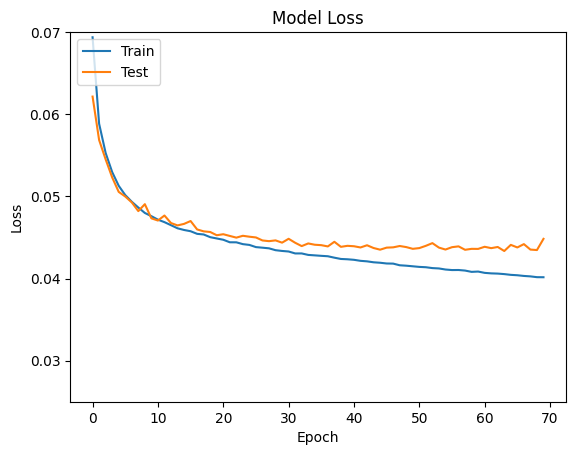

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0.025, 0.07)
plt.show()

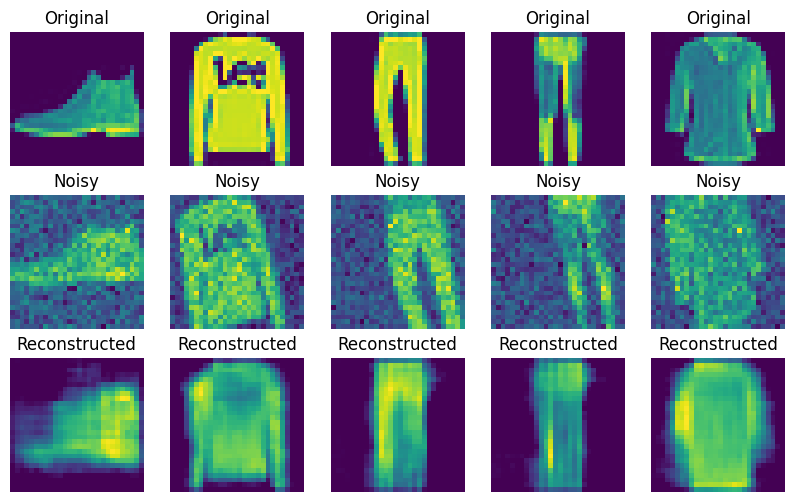

In [51]:

n = 5  # Number of images to display
plt.figure(figsize=(10, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')

    # Noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_x_test[i])
    plt.title('Noisy')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predictions_test[i])
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()

# batch_size = 128


50000
10000
10000
50000
10000
10000
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


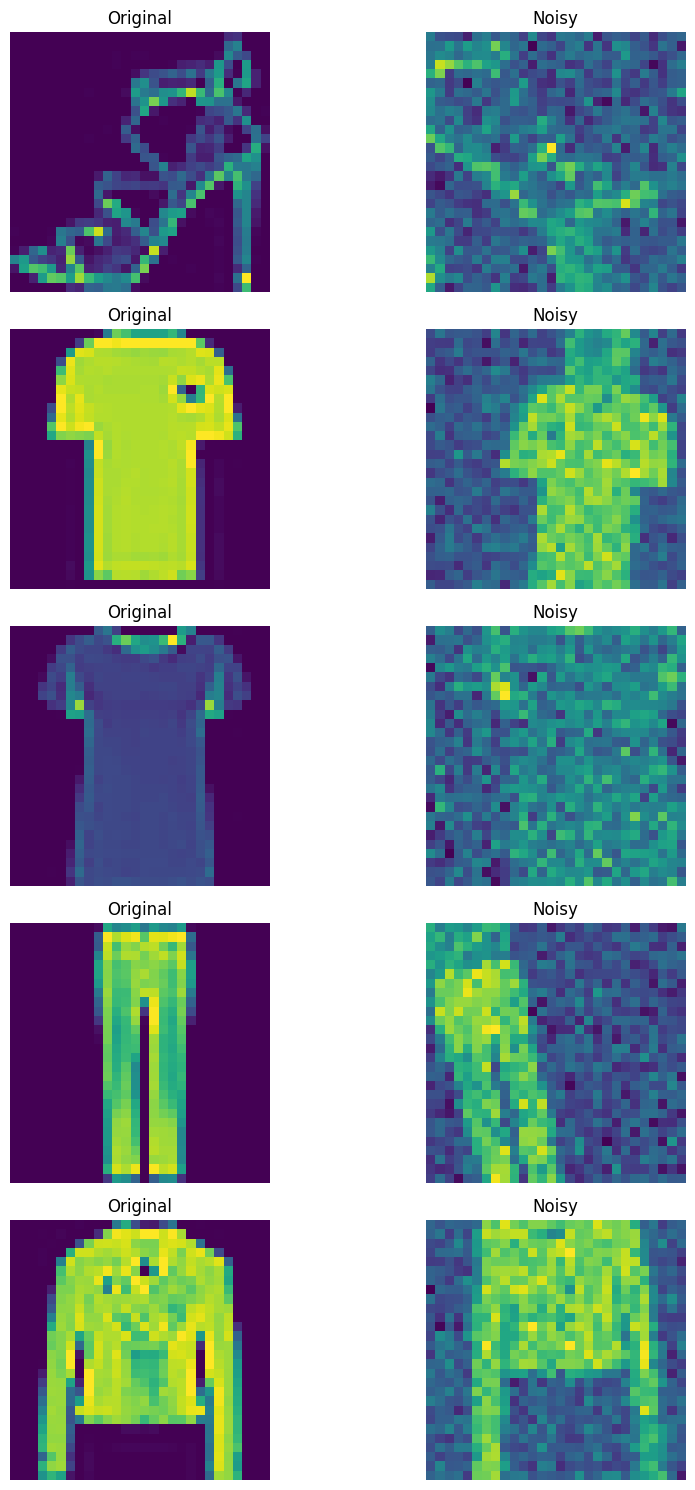

In [52]:
rotation_range = 30  # Degrees
width_shift_range = 0.2  # Fraction of total width
height_shift_range = 0.2  # Fraction of total height
shear_range = 0.2  # Shear angle in radians
zoom_range = 0.2  # Random zoom range
horizontal_flip = True  # Allow horizontal flipping
fill_modes = ['constant', 'nearest', 'reflect', 'wrap']

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Split the training data into train, test, and validation sets
random_state = 42
test_size = 0.2
x_train, x_val = train_test_split(x_train, random_state=random_state, test_size=(1/6))
# x_test, x_val = train_test_split(x_test, random_state=random_state, test_size=0.5)
print(len(x_train))
print(len(x_val))
print(len(x_test))
# Prepare Gaussian Noise Function
def add_noise(image):
    noise_mean = 0
    noise_std = 0.5
    noise_factor = 0.3
    noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
    return noisy_image

noisy_x_train = []
noisy_x_val = []
noisy_x_test = []

# Define noise parameters

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=add_noise
)

# # Example usage of datagen to generate augmented images
# # This is typically used in a loop to generate batches of augmented images during training
# batch_size = 32
# augmented_images = datagen.flow(x_train.reshape(-1, 28, 28, 1), batch_size=batch_size)
# print(len(augmented_images))

# # Display the first 10 augmented images from the first batch
# for i in range(10):
#     augmented_image = augmented_images.next()
#     plt.figure(figsize=(2, 2))
#     plt.imshow(augmented_image[0].reshape(28, 28), cmap='viridis')
#     plt.axis('off')
#     plt.show()
# augmented_images = []

# Generate augmented images for each image in x_train
for image in x_train:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_train.append(augmented_image)
print(len(noisy_x_train))
for image in x_val:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_val.append(augmented_image)
print(len(noisy_x_val))

for image in x_test:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_test.append(augmented_image)
print(len(noisy_x_test))

noisy_x_train = np.array(noisy_x_train)
noisy_x_train = np.squeeze(noisy_x_train)
noisy_x_val = np.array(noisy_x_val)
noisy_x_val = np.squeeze(noisy_x_val)
noisy_x_test = np.array(noisy_x_test)
noisy_x_test = np.squeeze(noisy_x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(noisy_x_train.shape)
print(noisy_x_val.shape)
print(noisy_x_test.shape)

num_rows = 5
num_cols = 2

# Create a figure and axis for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Loop through the pairs of original and noisy images
for i in range(num_rows):
    # Display the original image
    axes[i, 0].imshow(x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    # Display the noisy image
    axes[i, 1].imshow(noisy_x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 1].set_title('Noisy')
    axes[i, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()



In [53]:
# noisy_x_train = np.array(noisy_x_train)
# noisy_x_train = np.squeeze(noisy_x_train)
# noisy_x_val = np.array(noisy_x_val)
# noisy_x_val = np.squeeze(noisy_x_val)
# noisy_x_test = np.array(noisy_x_test)
# noisy_x_test = np.squeeze(noisy_x_test)
# print(noisy_x_train.shape)
# print(noisy_x_val.shape)
# print(noisy_x_test.shape)

In [54]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [55]:
input_img = Input(shape=(28, 28, 1))
# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)

# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)

# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

x6 = UpSampling2D((2, 2))(x5)

x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)


x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)

# Layer 2
x9 = Conv2D(1, (3, 3), activation='relu', padding='same')(x8)

# Create the autoencoder model
autoencoder = Model(input_img, x9)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.0003), loss='mse')

# Display the model summary
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 28, 28, 256)       2560      
                                                                 
 conv2d_41 (Conv2D)          (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_42 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 conv2d_43 (Conv2D)          (None, 14, 14, 64)        36928     
                                                           

In [56]:
callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(
    noisy_x_train,
    x_train,
    epochs=70,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_x_val, x_val),
    callbacks=[callback],
)

Epoch 1/70
391/391 [==============================] - 11s 25ms/step - loss: 0.0658 - val_loss: 0.0590
Epoch 2/70
391/391 [==============================] - 9s 24ms/step - loss: 0.0558 - val_loss: 0.0534
Epoch 3/70
391/391 [==============================] - 10s 24ms/step - loss: 0.0520 - val_loss: 0.0518
Epoch 4/70
391/391 [==============================] - 10s 24ms/step - loss: 0.0502 - val_loss: 0.0497
Epoch 5/70
391/391 [==============================] - 10s 24ms/step - loss: 0.0489 - val_loss: 0.0484
Epoch 6/70
391/391 [==============================] - 10s 24ms/step - loss: 0.0480 - val_loss: 0.0479
Epoch 7/70
391/391 [==============================] - 10s 24ms/step - loss: 0.0473 - val_loss: 0.0472
Epoch 8/70
391/391 [==============================] - 10s 24ms/step - loss: 0.0467 - val_loss: 0.0465
Epoch 9/70
391/391 [==============================] - 9s 24ms/step - loss: 0.0462 - val_loss: 0.0465
Epoch 10/70
391/391 [==============================] - 10s 24ms/step - loss: 0.0458 

In [57]:
predictions_test = autoencoder.predict(noisy_x_test)

313/313 [==============================] - 1s 3ms/step


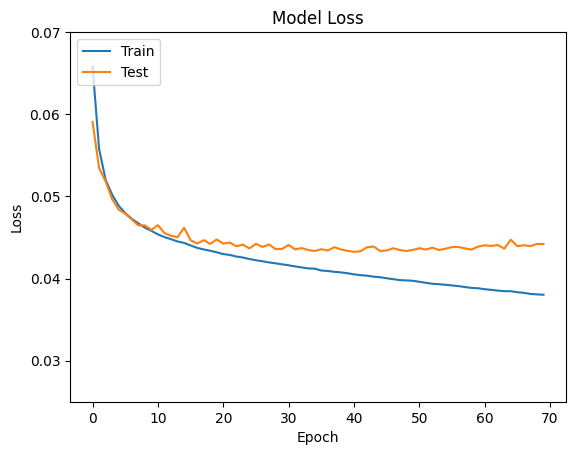

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0.025, 0.07)
plt.show()

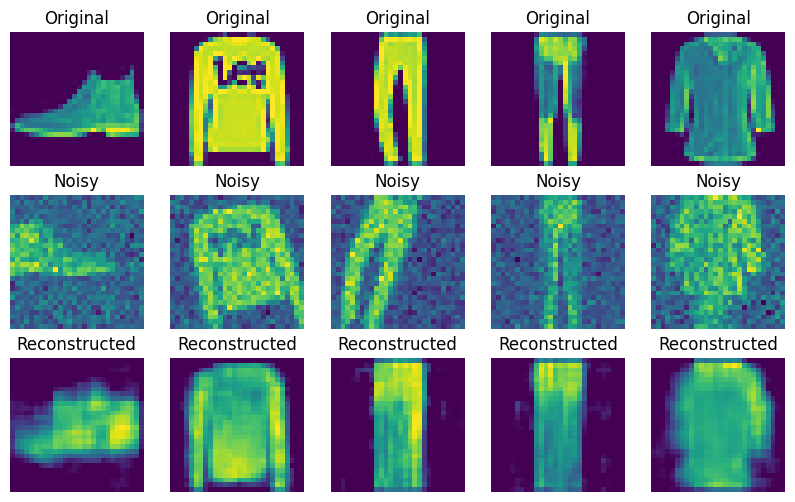

In [59]:

n = 5  # Number of images to display
plt.figure(figsize=(10, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')

    # Noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_x_test[i])
    plt.title('Noisy')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predictions_test[i])
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()

# batch_size = 256

50000
10000
10000
50000
10000
10000
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


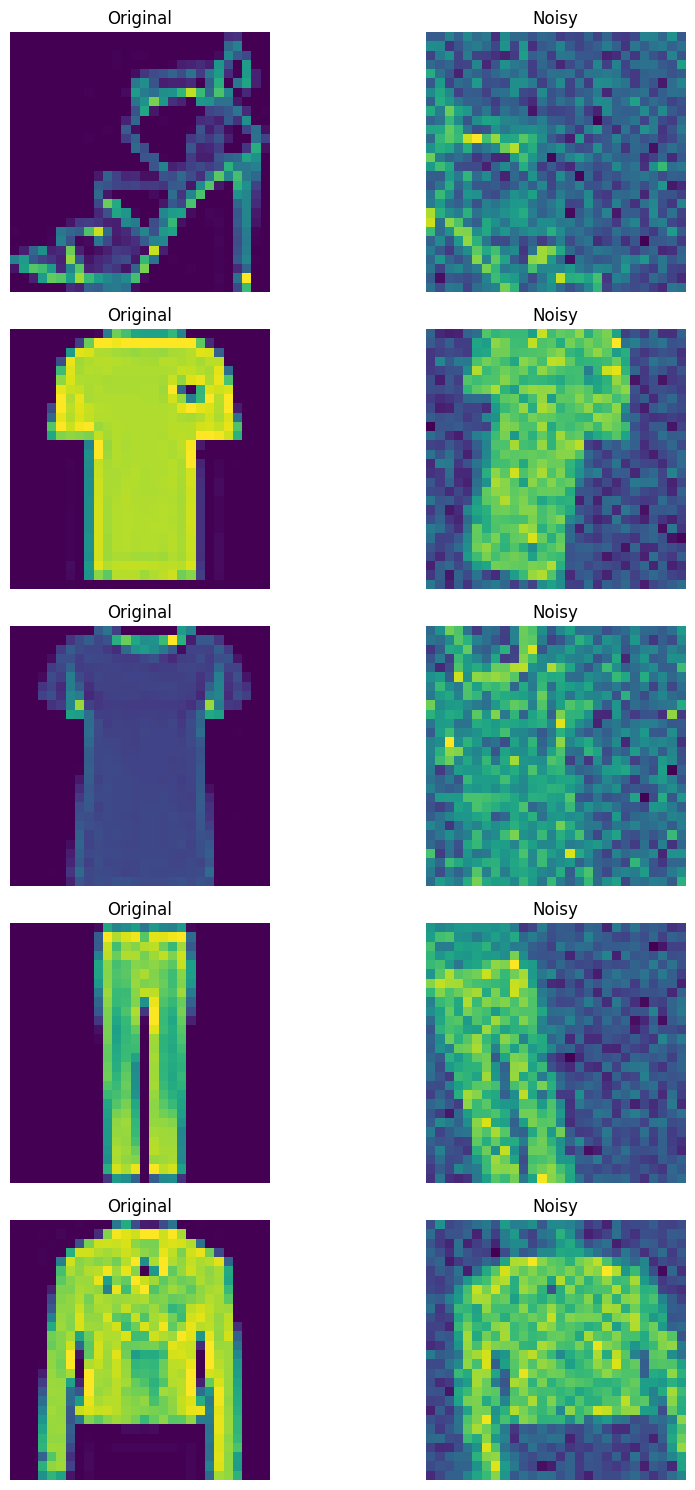

In [60]:
rotation_range = 30  # Degrees
width_shift_range = 0.2  # Fraction of total width
height_shift_range = 0.2  # Fraction of total height
shear_range = 0.2  # Shear angle in radians
zoom_range = 0.2  # Random zoom range
horizontal_flip = True  # Allow horizontal flipping
fill_modes = ['constant', 'nearest', 'reflect', 'wrap']

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Split the training data into train, test, and validation sets
random_state = 42
test_size = 0.2
x_train, x_val = train_test_split(x_train, random_state=random_state, test_size=(1/6))
# x_test, x_val = train_test_split(x_test, random_state=random_state, test_size=0.5)
print(len(x_train))
print(len(x_val))
print(len(x_test))
# Prepare Gaussian Noise Function
def add_noise(image):
    noise_mean = 0
    noise_std = 0.5
    noise_factor = 0.3
    noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
    return noisy_image

noisy_x_train = []
noisy_x_val = []
noisy_x_test = []

# Define noise parameters

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=add_noise
)

# # Example usage of datagen to generate augmented images
# # This is typically used in a loop to generate batches of augmented images during training
# batch_size = 32
# augmented_images = datagen.flow(x_train.reshape(-1, 28, 28, 1), batch_size=batch_size)
# print(len(augmented_images))

# # Display the first 10 augmented images from the first batch
# for i in range(10):
#     augmented_image = augmented_images.next()
#     plt.figure(figsize=(2, 2))
#     plt.imshow(augmented_image[0].reshape(28, 28), cmap='viridis')
#     plt.axis('off')
#     plt.show()
# augmented_images = []

# Generate augmented images for each image in x_train
for image in x_train:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_train.append(augmented_image)
print(len(noisy_x_train))
for image in x_val:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_val.append(augmented_image)
print(len(noisy_x_val))

for image in x_test:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_test.append(augmented_image)
print(len(noisy_x_test))

noisy_x_train = np.array(noisy_x_train)
noisy_x_train = np.squeeze(noisy_x_train)
noisy_x_val = np.array(noisy_x_val)
noisy_x_val = np.squeeze(noisy_x_val)
noisy_x_test = np.array(noisy_x_test)
noisy_x_test = np.squeeze(noisy_x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(noisy_x_train.shape)
print(noisy_x_val.shape)
print(noisy_x_test.shape)

num_rows = 5
num_cols = 2

# Create a figure and axis for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Loop through the pairs of original and noisy images
for i in range(num_rows):
    # Display the original image
    axes[i, 0].imshow(x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    # Display the noisy image
    axes[i, 1].imshow(noisy_x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 1].set_title('Noisy')
    axes[i, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()



In [61]:
# noisy_x_train = np.array(noisy_x_train)
# noisy_x_train = np.squeeze(noisy_x_train)
# noisy_x_val = np.array(noisy_x_val)
# noisy_x_val = np.squeeze(noisy_x_val)
# noisy_x_test = np.array(noisy_x_test)
# noisy_x_test = np.squeeze(noisy_x_test)
# print(noisy_x_train.shape)
# print(noisy_x_val.shape)
# print(noisy_x_test.shape)

In [62]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [63]:
input_img = Input(shape=(28, 28, 1))
# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)

# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)

# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

x6 = UpSampling2D((2, 2))(x5)

x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)


x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)

# Layer 2
x9 = Conv2D(1, (3, 3), activation='relu', padding='same')(x8)

# Create the autoencoder model
autoencoder = Model(input_img, x9)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.0003), loss='mse')

# Display the model summary
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_47 (Conv2D)          (None, 28, 28, 256)       2560      
                                                                 
 conv2d_48 (Conv2D)          (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_49 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 conv2d_50 (Conv2D)          (None, 14, 14, 64)        36928     
                                                           

In [64]:
callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(
    noisy_x_train,
    x_train,
    epochs=70,
    batch_size=256,
    shuffle=True,
    validation_data=(noisy_x_val, x_val),
    callbacks=[callback],
)

Epoch 1/70
196/196 [==============================] - 9s 45ms/step - loss: 0.0707 - val_loss: 0.0621
Epoch 2/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0585 - val_loss: 0.0570
Epoch 3/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0551 - val_loss: 0.0535
Epoch 4/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0526 - val_loss: 0.0526
Epoch 5/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0509 - val_loss: 0.0509
Epoch 6/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0499 - val_loss: 0.0500
Epoch 7/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0492 - val_loss: 0.0497
Epoch 8/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0486 - val_loss: 0.0495
Epoch 9/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0480 - val_loss: 0.0481
Epoch 10/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0474 - val_lo

In [65]:
predictions_test = autoencoder.predict(noisy_x_test)

313/313 [==============================] - 1s 3ms/step


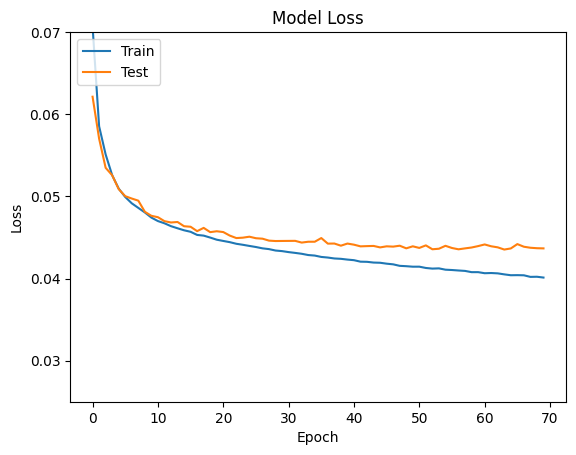

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0.025, 0.07)
plt.show()

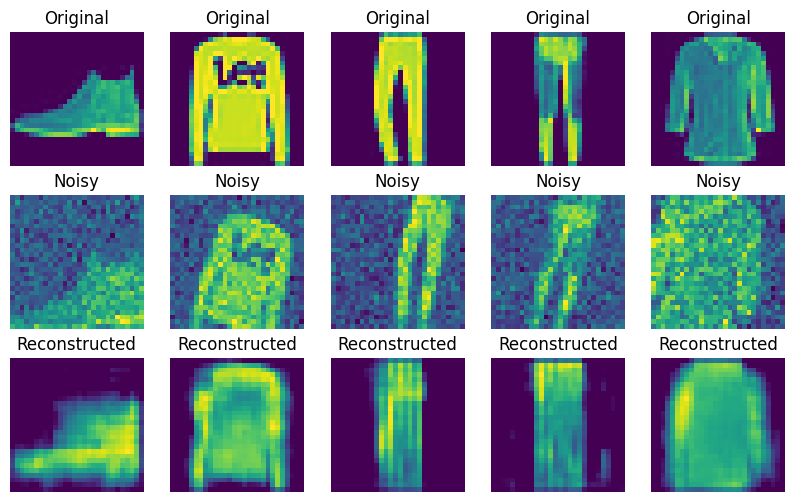

In [67]:

n = 5  # Number of images to display
plt.figure(figsize=(10, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')

    # Noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_x_test[i])
    plt.title('Noisy')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predictions_test[i])
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()

# learning_rate = 0.0001

50000
10000
10000
50000
10000
10000
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


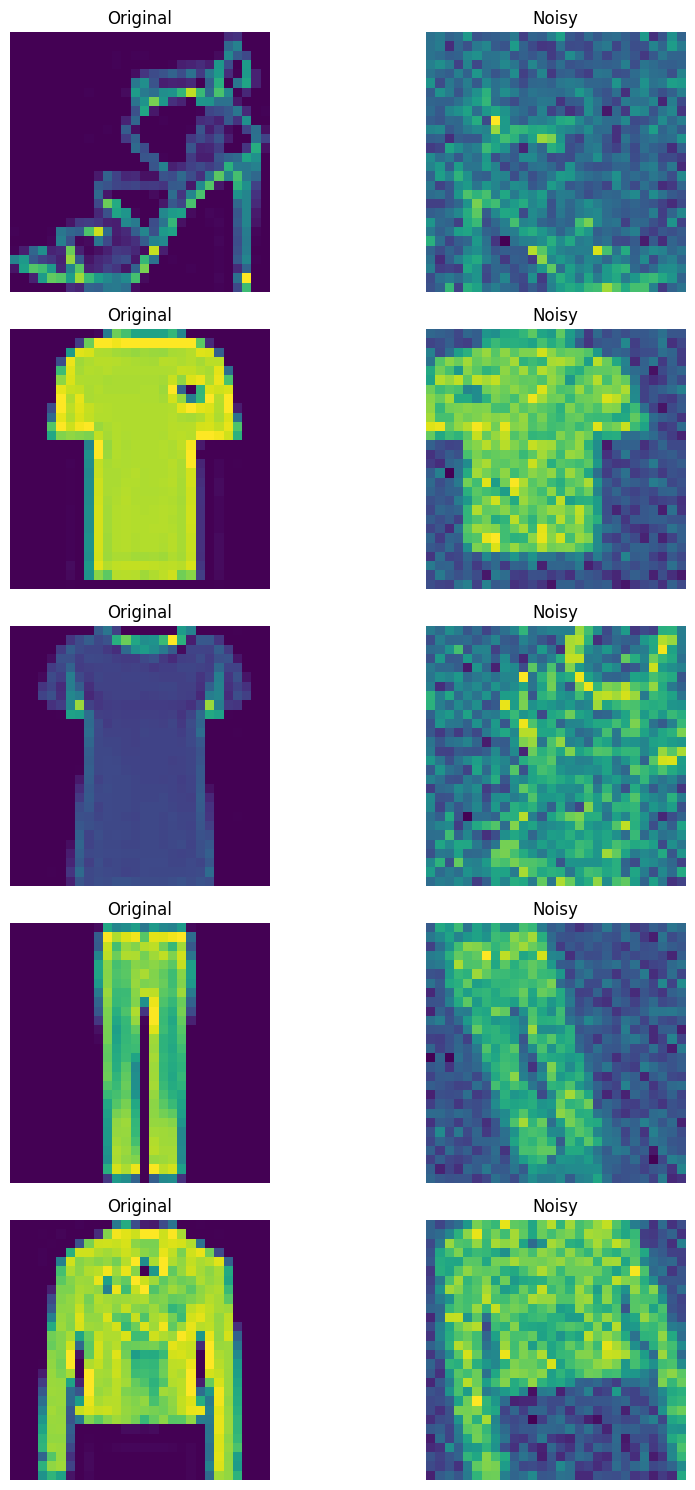

In [68]:
rotation_range = 30  # Degrees
width_shift_range = 0.2  # Fraction of total width
height_shift_range = 0.2  # Fraction of total height
shear_range = 0.2  # Shear angle in radians
zoom_range = 0.2  # Random zoom range
horizontal_flip = True  # Allow horizontal flipping
fill_modes = ['constant', 'nearest', 'reflect', 'wrap']

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Split the training data into train, test, and validation sets
random_state = 42
test_size = 0.2
x_train, x_val = train_test_split(x_train, random_state=random_state, test_size=(1/6))
# x_test, x_val = train_test_split(x_test, random_state=random_state, test_size=0.5)
print(len(x_train))
print(len(x_val))
print(len(x_test))
# Prepare Gaussian Noise Function
def add_noise(image):
    noise_mean = 0
    noise_std = 0.5
    noise_factor = 0.3
    noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
    return noisy_image

noisy_x_train = []
noisy_x_val = []
noisy_x_test = []

# Define noise parameters

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=add_noise
)

# # Example usage of datagen to generate augmented images
# # This is typically used in a loop to generate batches of augmented images during training
# batch_size = 32
# augmented_images = datagen.flow(x_train.reshape(-1, 28, 28, 1), batch_size=batch_size)
# print(len(augmented_images))

# # Display the first 10 augmented images from the first batch
# for i in range(10):
#     augmented_image = augmented_images.next()
#     plt.figure(figsize=(2, 2))
#     plt.imshow(augmented_image[0].reshape(28, 28), cmap='viridis')
#     plt.axis('off')
#     plt.show()
# augmented_images = []

# Generate augmented images for each image in x_train
for image in x_train:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_train.append(augmented_image)
print(len(noisy_x_train))
for image in x_val:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_val.append(augmented_image)
print(len(noisy_x_val))

for image in x_test:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_test.append(augmented_image)
print(len(noisy_x_test))

noisy_x_train = np.array(noisy_x_train)
noisy_x_train = np.squeeze(noisy_x_train)
noisy_x_val = np.array(noisy_x_val)
noisy_x_val = np.squeeze(noisy_x_val)
noisy_x_test = np.array(noisy_x_test)
noisy_x_test = np.squeeze(noisy_x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(noisy_x_train.shape)
print(noisy_x_val.shape)
print(noisy_x_test.shape)

num_rows = 5
num_cols = 2

# Create a figure and axis for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Loop through the pairs of original and noisy images
for i in range(num_rows):
    # Display the original image
    axes[i, 0].imshow(x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    # Display the noisy image
    axes[i, 1].imshow(noisy_x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 1].set_title('Noisy')
    axes[i, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()



In [69]:
# noisy_x_train = np.array(noisy_x_train)
# noisy_x_train = np.squeeze(noisy_x_train)
# noisy_x_val = np.array(noisy_x_val)
# noisy_x_val = np.squeeze(noisy_x_val)
# noisy_x_test = np.array(noisy_x_test)
# noisy_x_test = np.squeeze(noisy_x_test)
# print(noisy_x_train.shape)
# print(noisy_x_val.shape)
# print(noisy_x_test.shape)

In [70]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [71]:
input_img = Input(shape=(28, 28, 1))
# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)

# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)

# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

x6 = UpSampling2D((2, 2))(x5)

x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)


x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)

# Layer 2
x9 = Conv2D(1, (3, 3), activation='relu', padding='same')(x8)

# Create the autoencoder model
autoencoder = Model(input_img, x9)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.0003), loss='mse')

# Display the model summary
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_54 (Conv2D)          (None, 28, 28, 256)       2560      
                                                                 
 conv2d_55 (Conv2D)          (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_56 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 conv2d_57 (Conv2D)          (None, 14, 14, 64)        36928     
                                                           

In [72]:
callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(
    noisy_x_train,
    x_train,
    epochs=70,
    batch_size=256,
    shuffle=True,
    validation_data=(noisy_x_val, x_val),
    callbacks=[callback],
)

Epoch 1/70
196/196 [==============================] - 9s 45ms/step - loss: 0.0703 - val_loss: 0.0618
Epoch 2/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0587 - val_loss: 0.0571
Epoch 3/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0554 - val_loss: 0.0541
Epoch 4/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0530 - val_loss: 0.0521
Epoch 5/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0514 - val_loss: 0.0502
Epoch 6/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0500 - val_loss: 0.0497
Epoch 7/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0491 - val_loss: 0.0496
Epoch 8/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0485 - val_loss: 0.0480
Epoch 9/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0478 - val_loss: 0.0481
Epoch 10/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0474 - val_lo

In [73]:
predictions_test = autoencoder.predict(noisy_x_test)

313/313 [==============================] - 1s 3ms/step


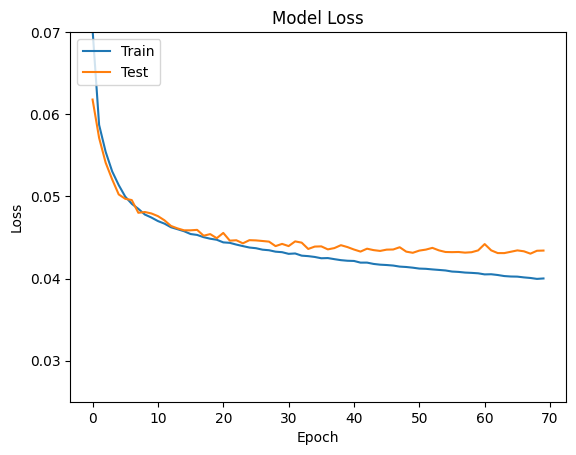

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0.025, 0.07)
plt.show()

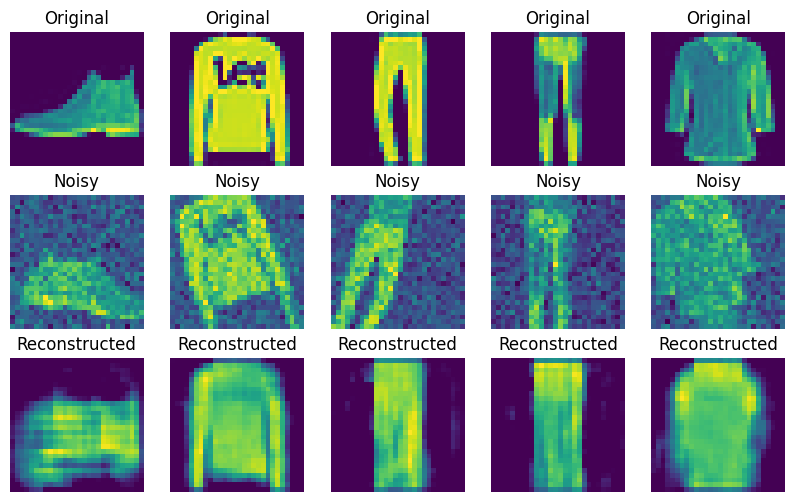

In [75]:

n = 5  # Number of images to display
plt.figure(figsize=(10, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')

    # Noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_x_test[i])
    plt.title('Noisy')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predictions_test[i])
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()

# learning_rate = 0.0003

50000
10000
10000
50000
10000
10000
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


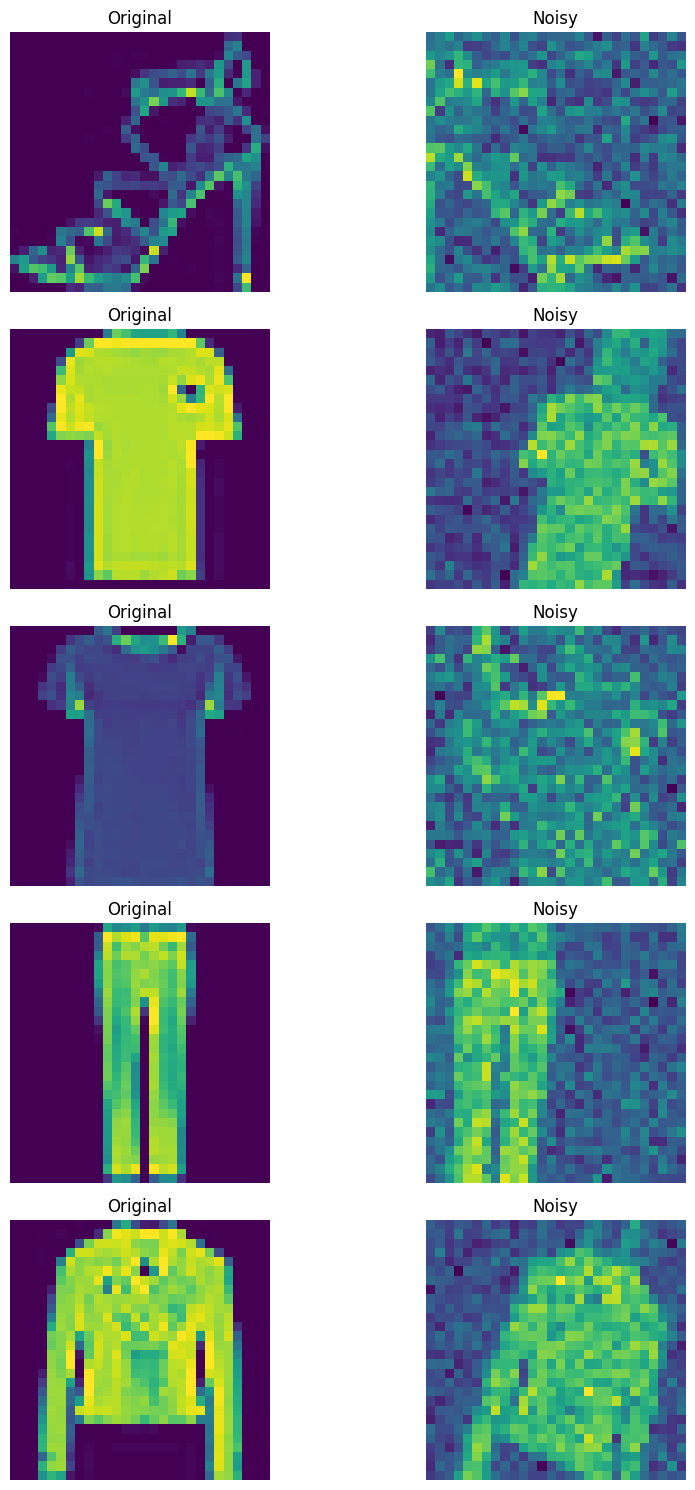

In [76]:
rotation_range = 30  # Degrees
width_shift_range = 0.2  # Fraction of total width
height_shift_range = 0.2  # Fraction of total height
shear_range = 0.2  # Shear angle in radians
zoom_range = 0.2  # Random zoom range
horizontal_flip = True  # Allow horizontal flipping
fill_modes = ['constant', 'nearest', 'reflect', 'wrap']

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Split the training data into train, test, and validation sets
random_state = 42
test_size = 0.2
x_train, x_val = train_test_split(x_train, random_state=random_state, test_size=(1/6))
# x_test, x_val = train_test_split(x_test, random_state=random_state, test_size=0.5)
print(len(x_train))
print(len(x_val))
print(len(x_test))
# Prepare Gaussian Noise Function
def add_noise(image):
    noise_mean = 0
    noise_std = 0.5
    noise_factor = 0.3
    noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
    return noisy_image

noisy_x_train = []
noisy_x_val = []
noisy_x_test = []

# Define noise parameters

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=add_noise
)

# # Example usage of datagen to generate augmented images
# # This is typically used in a loop to generate batches of augmented images during training
# batch_size = 32
# augmented_images = datagen.flow(x_train.reshape(-1, 28, 28, 1), batch_size=batch_size)
# print(len(augmented_images))

# # Display the first 10 augmented images from the first batch
# for i in range(10):
#     augmented_image = augmented_images.next()
#     plt.figure(figsize=(2, 2))
#     plt.imshow(augmented_image[0].reshape(28, 28), cmap='viridis')
#     plt.axis('off')
#     plt.show()
# augmented_images = []

# Generate augmented images for each image in x_train
for image in x_train:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_train.append(augmented_image)
print(len(noisy_x_train))
for image in x_val:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_val.append(augmented_image)
print(len(noisy_x_val))

for image in x_test:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_test.append(augmented_image)
print(len(noisy_x_test))

noisy_x_train = np.array(noisy_x_train)
noisy_x_train = np.squeeze(noisy_x_train)
noisy_x_val = np.array(noisy_x_val)
noisy_x_val = np.squeeze(noisy_x_val)
noisy_x_test = np.array(noisy_x_test)
noisy_x_test = np.squeeze(noisy_x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(noisy_x_train.shape)
print(noisy_x_val.shape)
print(noisy_x_test.shape)

num_rows = 5
num_cols = 2

# Create a figure and axis for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Loop through the pairs of original and noisy images
for i in range(num_rows):
    # Display the original image
    axes[i, 0].imshow(x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    # Display the noisy image
    axes[i, 1].imshow(noisy_x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 1].set_title('Noisy')
    axes[i, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()



In [77]:
# noisy_x_train = np.array(noisy_x_train)
# noisy_x_train = np.squeeze(noisy_x_train)
# noisy_x_val = np.array(noisy_x_val)
# noisy_x_val = np.squeeze(noisy_x_val)
# noisy_x_test = np.array(noisy_x_test)
# noisy_x_test = np.squeeze(noisy_x_test)
# print(noisy_x_train.shape)
# print(noisy_x_val.shape)
# print(noisy_x_test.shape)

In [78]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [79]:
input_img = Input(shape=(28, 28, 1))
# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)

# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)

# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

x6 = UpSampling2D((2, 2))(x5)

x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)


x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)

# Layer 2
x9 = Conv2D(1, (3, 3), activation='relu', padding='same')(x8)

# Create the autoencoder model
autoencoder = Model(input_img, x9)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.0003), loss='mse')

# Display the model summary
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_61 (Conv2D)          (None, 28, 28, 256)       2560      
                                                                 
 conv2d_62 (Conv2D)          (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_63 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 conv2d_64 (Conv2D)          (None, 14, 14, 64)        36928     
                                                           

In [80]:
callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(
    noisy_x_train,
    x_train,
    epochs=70,
    batch_size=256,
    shuffle=True,
    validation_data=(noisy_x_val, x_val),
    callbacks=[callback],
)

Epoch 1/70
196/196 [==============================] - 10s 47ms/step - loss: 0.0710 - val_loss: 0.0621
Epoch 2/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0592 - val_loss: 0.0569
Epoch 3/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0557 - val_loss: 0.0543
Epoch 4/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0530 - val_loss: 0.0531
Epoch 5/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0514 - val_loss: 0.0509
Epoch 6/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0500 - val_loss: 0.0501
Epoch 7/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0493 - val_loss: 0.0497
Epoch 8/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0486 - val_loss: 0.0489
Epoch 9/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0481 - val_loss: 0.0481
Epoch 10/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0475 - val_l

In [81]:
predictions_test = autoencoder.predict(noisy_x_test)

313/313 [==============================] - 1s 3ms/step


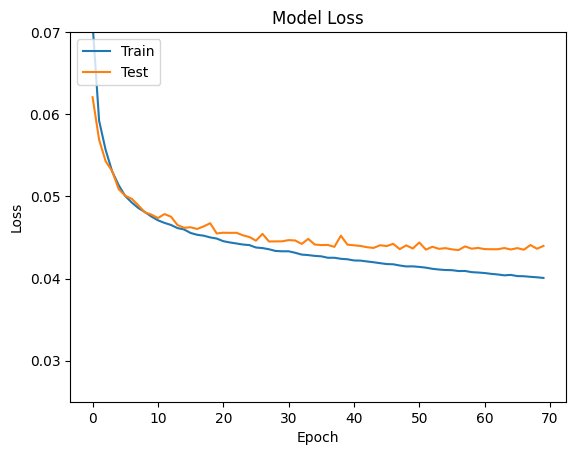

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0.025, 0.07)
plt.show()

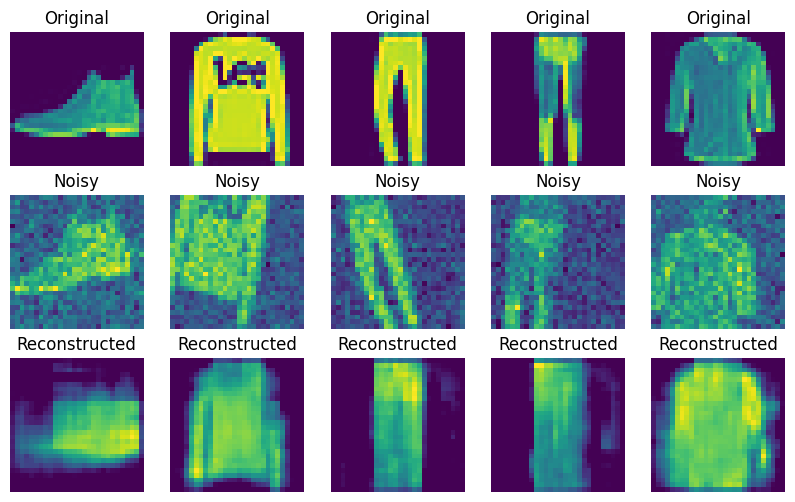

In [83]:

n = 5  # Number of images to display
plt.figure(figsize=(10, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')

    # Noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_x_test[i])
    plt.title('Noisy')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predictions_test[i])
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()

# original convolution node

50000
10000
10000
50000
10000
10000
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


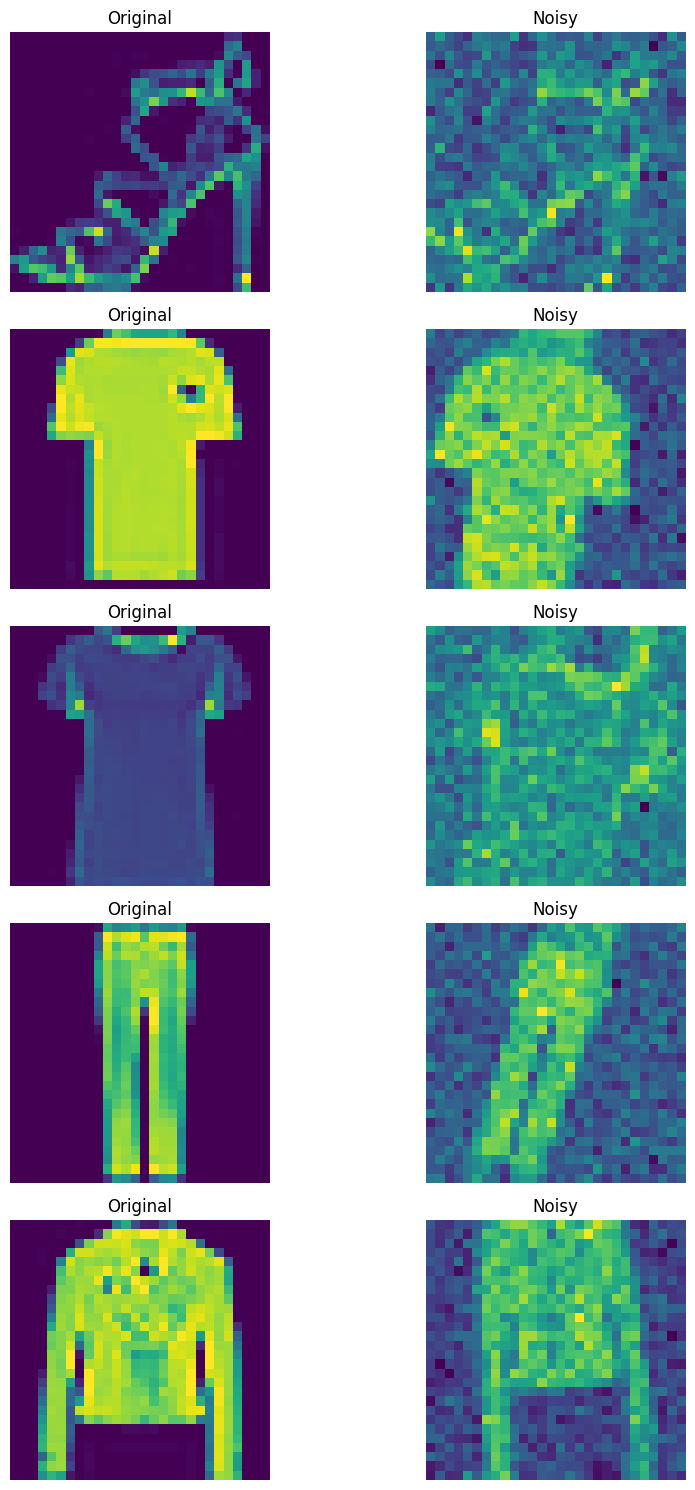

In [84]:
rotation_range = 30  # Degrees
width_shift_range = 0.2  # Fraction of total width
height_shift_range = 0.2  # Fraction of total height
shear_range = 0.2  # Shear angle in radians
zoom_range = 0.2  # Random zoom range
horizontal_flip = True  # Allow horizontal flipping
fill_modes = ['constant', 'nearest', 'reflect', 'wrap']

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Split the training data into train, test, and validation sets
random_state = 42
test_size = 0.2
x_train, x_val = train_test_split(x_train, random_state=random_state, test_size=(1/6))
# x_test, x_val = train_test_split(x_test, random_state=random_state, test_size=0.5)
print(len(x_train))
print(len(x_val))
print(len(x_test))
# Prepare Gaussian Noise Function
def add_noise(image):
    noise_mean = 0
    noise_std = 0.5
    noise_factor = 0.3
    noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
    return noisy_image

noisy_x_train = []
noisy_x_val = []
noisy_x_test = []

# Define noise parameters

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=add_noise
)

# # Example usage of datagen to generate augmented images
# # This is typically used in a loop to generate batches of augmented images during training
# batch_size = 32
# augmented_images = datagen.flow(x_train.reshape(-1, 28, 28, 1), batch_size=batch_size)
# print(len(augmented_images))

# # Display the first 10 augmented images from the first batch
# for i in range(10):
#     augmented_image = augmented_images.next()
#     plt.figure(figsize=(2, 2))
#     plt.imshow(augmented_image[0].reshape(28, 28), cmap='viridis')
#     plt.axis('off')
#     plt.show()
# augmented_images = []

# Generate augmented images for each image in x_train
for image in x_train:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_train.append(augmented_image)
print(len(noisy_x_train))
for image in x_val:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_val.append(augmented_image)
print(len(noisy_x_val))

for image in x_test:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_test.append(augmented_image)
print(len(noisy_x_test))

noisy_x_train = np.array(noisy_x_train)
noisy_x_train = np.squeeze(noisy_x_train)
noisy_x_val = np.array(noisy_x_val)
noisy_x_val = np.squeeze(noisy_x_val)
noisy_x_test = np.array(noisy_x_test)
noisy_x_test = np.squeeze(noisy_x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(noisy_x_train.shape)
print(noisy_x_val.shape)
print(noisy_x_test.shape)

num_rows = 5
num_cols = 2

# Create a figure and axis for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Loop through the pairs of original and noisy images
for i in range(num_rows):
    # Display the original image
    axes[i, 0].imshow(x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    # Display the noisy image
    axes[i, 1].imshow(noisy_x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 1].set_title('Noisy')
    axes[i, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()



In [85]:
# noisy_x_train = np.array(noisy_x_train)
# noisy_x_train = np.squeeze(noisy_x_train)
# noisy_x_val = np.array(noisy_x_val)
# noisy_x_val = np.squeeze(noisy_x_val)
# noisy_x_test = np.array(noisy_x_test)
# noisy_x_test = np.squeeze(noisy_x_test)
# print(noisy_x_train.shape)
# print(noisy_x_val.shape)
# print(noisy_x_test.shape)

In [86]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [87]:
input_img = Input(shape=(28, 28, 1))
# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)

# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)

# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

x6 = UpSampling2D((2, 2))(x5)

x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)


x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)

# Layer 2
x9 = Conv2D(1, (3, 3), activation='relu', padding='same')(x8)

# Create the autoencoder model
autoencoder = Model(input_img, x9)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.0003), loss='mse')

# Display the model summary
autoencoder.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_68 (Conv2D)          (None, 28, 28, 256)       2560      
                                                                 
 conv2d_69 (Conv2D)          (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_70 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 conv2d_71 (Conv2D)          (None, 14, 14, 64)        36928     
                                                           

In [88]:
callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(
    noisy_x_train,
    x_train,
    epochs=70,
    batch_size=256,
    shuffle=True,
    validation_data=(noisy_x_val, x_val),
    callbacks=[callback],
)

Epoch 1/70
196/196 [==============================] - 9s 45ms/step - loss: 0.0714 - val_loss: 0.0619
Epoch 2/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0593 - val_loss: 0.0576
Epoch 3/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0559 - val_loss: 0.0543
Epoch 4/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0532 - val_loss: 0.0527
Epoch 5/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0513 - val_loss: 0.0514
Epoch 6/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0503 - val_loss: 0.0498
Epoch 7/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0493 - val_loss: 0.0491
Epoch 8/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0486 - val_loss: 0.0482
Epoch 9/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0480 - val_loss: 0.0490
Epoch 10/70
196/196 [==============================] - 9s 44ms/step - loss: 0.0475 - val_lo

In [89]:
predictions_test = autoencoder.predict(noisy_x_test)

313/313 [==============================] - 1s 3ms/step


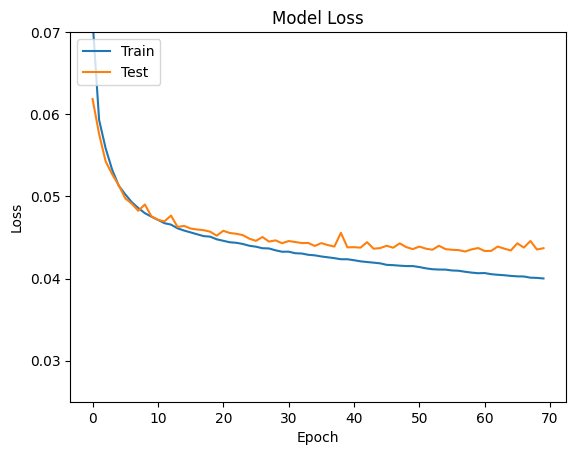

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0.025, 0.07)
plt.show()

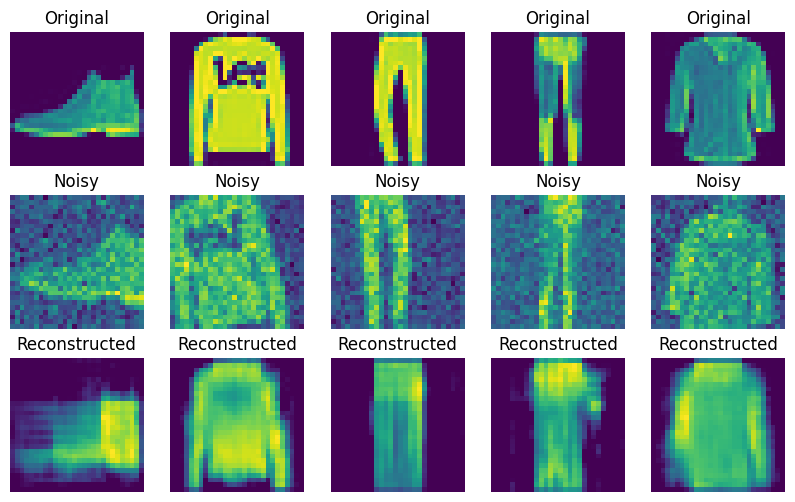

In [91]:

n = 5  # Number of images to display
plt.figure(figsize=(10, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')

    # Noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_x_test[i])
    plt.title('Noisy')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predictions_test[i])
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()

# double convolution + dropout

50000
10000
10000
50000
10000
10000
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


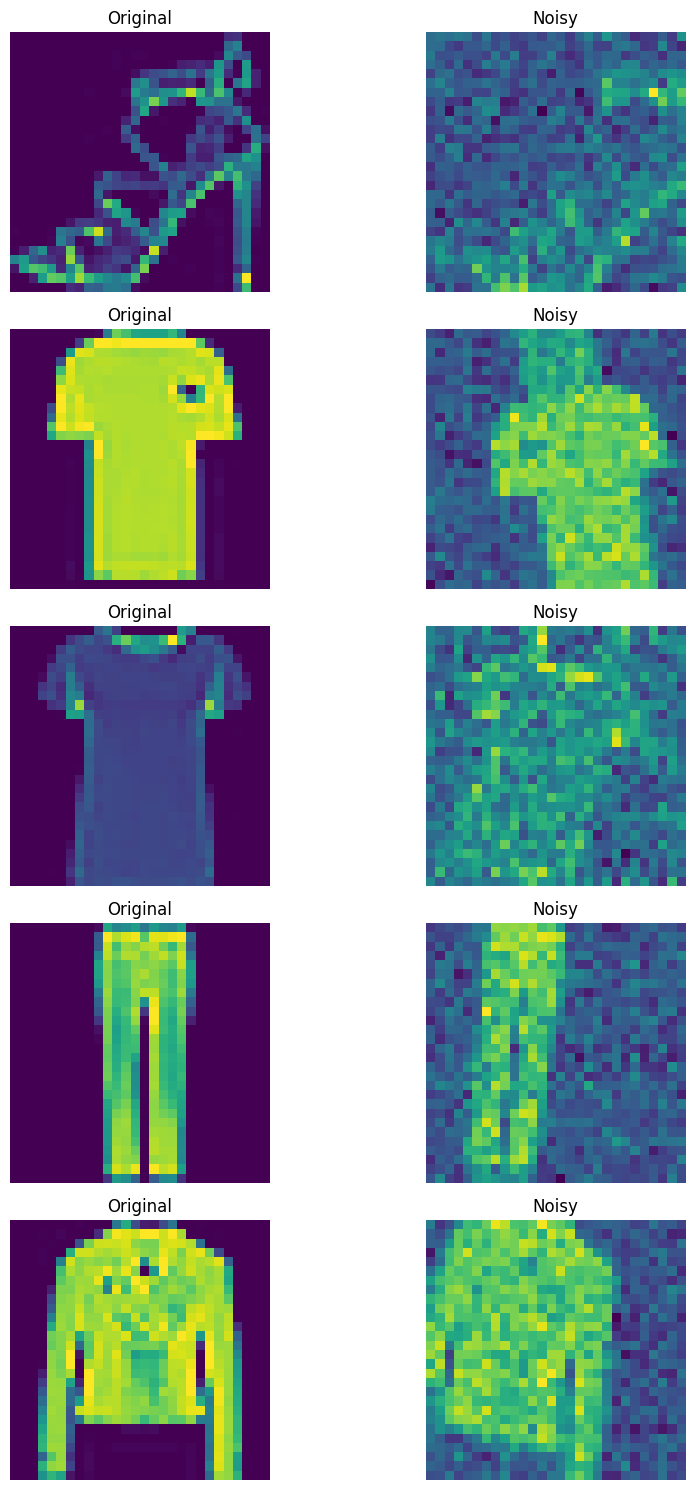

In [92]:
rotation_range = 30  # Degrees
width_shift_range = 0.2  # Fraction of total width
height_shift_range = 0.2  # Fraction of total height
shear_range = 0.2  # Shear angle in radians
zoom_range = 0.2  # Random zoom range
horizontal_flip = True  # Allow horizontal flipping
fill_modes = ['constant', 'nearest', 'reflect', 'wrap']

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Split the training data into train, test, and validation sets
random_state = 42
test_size = 0.2
x_train, x_val = train_test_split(x_train, random_state=random_state, test_size=(1/6))
# x_test, x_val = train_test_split(x_test, random_state=random_state, test_size=0.5)
print(len(x_train))
print(len(x_val))
print(len(x_test))
# Prepare Gaussian Noise Function
def add_noise(image):
    noise_mean = 0
    noise_std = 0.5
    noise_factor = 0.3
    noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
    return noisy_image

noisy_x_train = []
noisy_x_val = []
noisy_x_test = []

# Define noise parameters

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=add_noise
)

# # Example usage of datagen to generate augmented images
# # This is typically used in a loop to generate batches of augmented images during training
# batch_size = 32
# augmented_images = datagen.flow(x_train.reshape(-1, 28, 28, 1), batch_size=batch_size)
# print(len(augmented_images))

# # Display the first 10 augmented images from the first batch
# for i in range(10):
#     augmented_image = augmented_images.next()
#     plt.figure(figsize=(2, 2))
#     plt.imshow(augmented_image[0].reshape(28, 28), cmap='viridis')
#     plt.axis('off')
#     plt.show()
# augmented_images = []

# Generate augmented images for each image in x_train
for image in x_train:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_train.append(augmented_image)
print(len(noisy_x_train))
for image in x_val:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_val.append(augmented_image)
print(len(noisy_x_val))

for image in x_test:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_test.append(augmented_image)
print(len(noisy_x_test))

noisy_x_train = np.array(noisy_x_train)
noisy_x_train = np.squeeze(noisy_x_train)
noisy_x_val = np.array(noisy_x_val)
noisy_x_val = np.squeeze(noisy_x_val)
noisy_x_test = np.array(noisy_x_test)
noisy_x_test = np.squeeze(noisy_x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(noisy_x_train.shape)
print(noisy_x_val.shape)
print(noisy_x_test.shape)

num_rows = 5
num_cols = 2

# Create a figure and axis for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Loop through the pairs of original and noisy images
for i in range(num_rows):
    # Display the original image
    axes[i, 0].imshow(x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    # Display the noisy image
    axes[i, 1].imshow(noisy_x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 1].set_title('Noisy')
    axes[i, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()



In [93]:
# noisy_x_train = np.array(noisy_x_train)
# noisy_x_train = np.squeeze(noisy_x_train)
# noisy_x_val = np.array(noisy_x_val)
# noisy_x_val = np.squeeze(noisy_x_val)
# noisy_x_test = np.array(noisy_x_test)
# noisy_x_test = np.squeeze(noisy_x_test)
# print(noisy_x_train.shape)
# print(noisy_x_val.shape)
# print(noisy_x_test.shape)

In [94]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [95]:
input_img = Input(shape=(28, 28, 1))
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)

# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)

# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

x6 = UpSampling2D((2, 2))(x5)

x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)


x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)

# Layer 2
x9 = Conv2D(128, (3, 3), activation='relu', padding='same')(x8)
x10 = MaxPool2D((2, 2), strides=(2, 2))(x9)

# Layer 3
x11 = Conv2D(64, (3, 3), activation='relu', padding='same')(x10)

# Layer 4
x12 = Conv2D(64, (3, 3), activation='relu', padding='same')(x11)

x13 = UpSampling2D((2, 2))(x12)

x14 = Conv2D(128, (3, 3), activation='relu', padding='same')(x13)


x15 = Conv2D(256, (3, 3), activation='relu', padding='same')(x14)


x16 = Conv2D(1, (3, 3), activation='relu', padding='same')(x15)
x17 = Dropout(0.1)(x16)

# Create the autoencoder model
autoencoder = Model(input_img, x17)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.0003), loss='mse')

# Display the model summary
autoencoder.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_75 (Conv2D)          (None, 28, 28, 256)       2560      
                                                                 
 conv2d_76 (Conv2D)          (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 conv2d_78 (Conv2D)          (None, 14, 14, 64)        36928     
                                                          

In [96]:
callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(
    noisy_x_train,
    x_train,
    epochs=70,
    batch_size=256,
    shuffle=True,
    validation_data=(noisy_x_val, x_val),
    callbacks=[callback],
)

Epoch 1/70
196/196 [==============================] - 17s 80ms/step - loss: 0.0797 - val_loss: 0.0559
Epoch 2/70
196/196 [==============================] - 16s 79ms/step - loss: 0.0643 - val_loss: 0.0455
Epoch 3/70
196/196 [==============================] - 15s 79ms/step - loss: 0.0584 - val_loss: 0.0414
Epoch 4/70
196/196 [==============================] - 16s 79ms/step - loss: 0.0560 - val_loss: 0.0395
Epoch 5/70
196/196 [==============================] - 15s 79ms/step - loss: 0.0543 - val_loss: 0.0375
Epoch 6/70
196/196 [==============================] - 15s 79ms/step - loss: 0.0532 - val_loss: 0.0365
Epoch 7/70
196/196 [==============================] - 16s 79ms/step - loss: 0.0522 - val_loss: 0.0361
Epoch 8/70
196/196 [==============================] - 15s 79ms/step - loss: 0.0511 - val_loss: 0.0348
Epoch 9/70
196/196 [==============================] - 15s 79ms/step - loss: 0.0506 - val_loss: 0.0361
Epoch 10/70
196/196 [==============================] - 15s 79ms/step - loss: 0.050

In [97]:
predictions_test = autoencoder.predict(noisy_x_test)

313/313 [==============================] - 2s 5ms/step


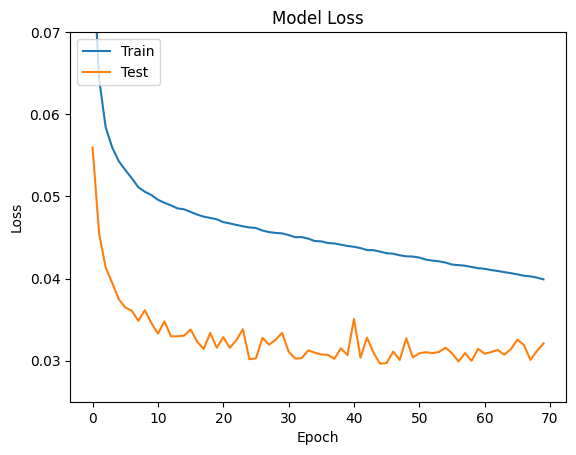

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0.025, 0.07)
plt.show()

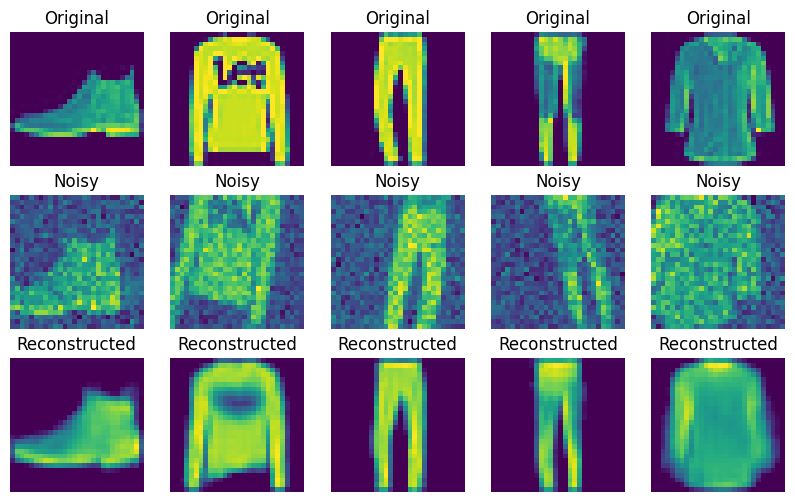

In [99]:

n = 5  # Number of images to display
plt.figure(figsize=(10, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')

    # Noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_x_test[i])
    plt.title('Noisy')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predictions_test[i])
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()